In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"D:\sales-forecast-ml-project\data\processed\sales_processed_data.csv", index_col = 'Row ID')
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Discount,Profit,year,month,day,weekday_1to7,quarter,weekday_name,is_weekend,profit_ratio
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,0.00,41.9136,2016,8,11,4,3,Thursday,0,0.160
2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,0.00,219.5820,2016,8,11,4,3,Thursday,0,0.300
3,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,0.00,6.8714,2016,12,6,2,4,Tuesday,0,0.470
4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,0.45,-383.0310,2015,11,10,2,4,Tuesday,0,-0.400
5,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,0.20,2.5164,2015,11,10,2,4,Tuesday,0,0.112


In [5]:
df.info()
df['Postal_Code'] = df['Postal_Code'].astype('object')

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 1 to 9994
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9993 non-null   object 
 1   Order_Date     9993 non-null   object 
 2   Ship_Date      9993 non-null   object 
 3   Ship_Mode      9993 non-null   object 
 4   Customer_ID    9993 non-null   object 
 5   Customer_Name  9993 non-null   object 
 6   Segment        9993 non-null   object 
 7   Country        9993 non-null   object 
 8   City           9993 non-null   object 
 9   State          9993 non-null   object 
 10  Postal_Code    9993 non-null   int64  
 11  Region         9993 non-null   object 
 12  Product_ID     9993 non-null   object 
 13  Category       9993 non-null   object 
 14  Sub-Category   9993 non-null   object 
 15  Product_Name   9993 non-null   object 
 16  Sales          9993 non-null   float64
 17  Quantity       9993 non-null   int64  
 18  Discount     

In [6]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df

,Sales,Quantity,Discount,Profit,year,month,day,weekday_1to7,quarter,is_weekend,profit_ratio
Row ID,,,,,,,,,,,
1,261.9600,2,0.00,41.9136,2016,8,11,4,3,0,0.160
2,731.9400,3,0.00,219.5820,2016,8,11,4,3,0,0.300
3,14.6200,2,0.00,6.8714,2016,12,6,2,4,0,0.470
4,957.5775,5,0.45,-383.0310,2015,11,10,2,4,0,-0.400
5,22.3680,2,0.20,2.5164,2015,11,10,2,4,0,0.112
...,...,...,...,...,...,...,...,...,...,...,...
9990,25.2480,3,0.20,4.1028,2014,1,21,2,1,0,0.162
9991,91.9600,2,0.00,15.6332,2017,2,26,7,1,1,0.170
9992,258.5760,2,0.20,19.3932,2017,2,26,7,1,1,0.075


In [7]:
numeric_df.describe()

,Sales,Quantity,Discount,Profit,year,month,day,weekday_1to7,quarter,is_weekend,profit_ratio
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971,2015.722406,7.174922,16.102872,4.091764,2.694686,0.316522,0.120312
std,623.276074,2.225149,0.206457,234.271476,1.123479,3.428298,8.064444,2.109466,1.107669,0.465142,0.466768
min,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-2.750000
25%,17.280000,2.000000,0.000000,1.731000,2015.000000,4.000000,10.000000,2.000000,2.000000,0.000000,0.075000
50%,54.480000,3.000000,0.200000,8.671000,2016.000000,8.000000,15.000000,4.000000,3.000000,0.000000,0.270000
75%,209.940000,5.000000,0.200000,29.364000,2017.000000,10.000000,23.000000,6.000000,4.000000,1.000000,0.362000
max,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,31.000000,7.000000,4.000000,1.000000,0.500000


In [8]:
skew_vals = numeric_df.skew().reset_index()
skew_vals.columns = ['feature', 'skew']

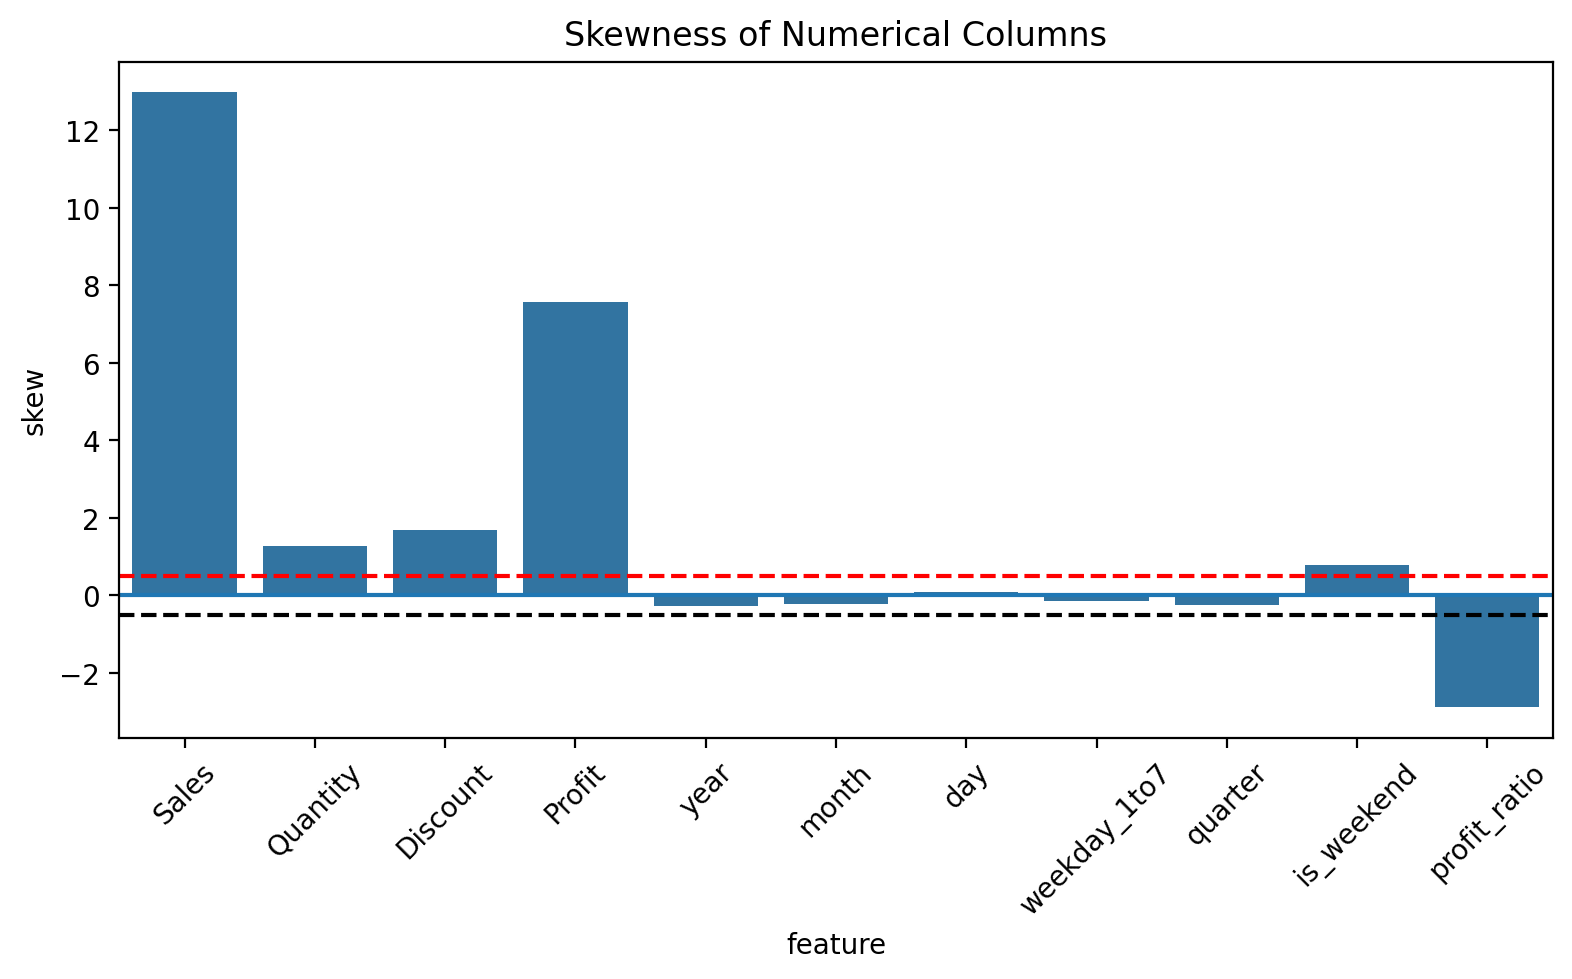

In [9]:
plt.figure(figsize=(8,5),dpi =200)

sns.barplot(
    x='feature',
    y='skew',
    data=skew_vals,
    errorbar=None
)

# threshold lines
plt.axhline(0)
plt.axhline(0.5, linestyle='--',c= 'red')
plt.axhline(-0.5, linestyle='--',c = 'black')

plt.title("Skewness of Numerical Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sales, Profit are comparatively very skewed towards right. Quantity and discount are also skewed. Profit ratio is negatively skewed. If the skewness is within the range of 0.5 and -0.5, then it is symmetric around the mean; otherwise excess positively (right) or negatively (left) skewed.

In [10]:
kurt_vals = numeric_df.kurt()   # pandas returns EXCESS kurtosis
print(kurt_vals)

Sales           305.281770
Quantity          1.991583
Discount          2.409977
Profit          397.150385
year             -1.307317
month            -1.179474
day              -1.065070
weekday_1to7     -1.334620
quarter          -1.287355
is_weekend       -1.377642
profit_ratio     10.173029
dtype: float64


In [11]:
kurt_df = (
    numeric_df.kurt()
    .reset_index()
)
kurt_df.columns = ['feature', 'kurtosis']

| Kurtosis | Meaning       | Action      |
| -------- | ------------- | ----------- |
| ≈ 0      | normal        | OK          |
| 1–3      | heavy tails   | check       |
| > 3      | many outliers | investigate |
| < 0      | flat/stable   | safe        |


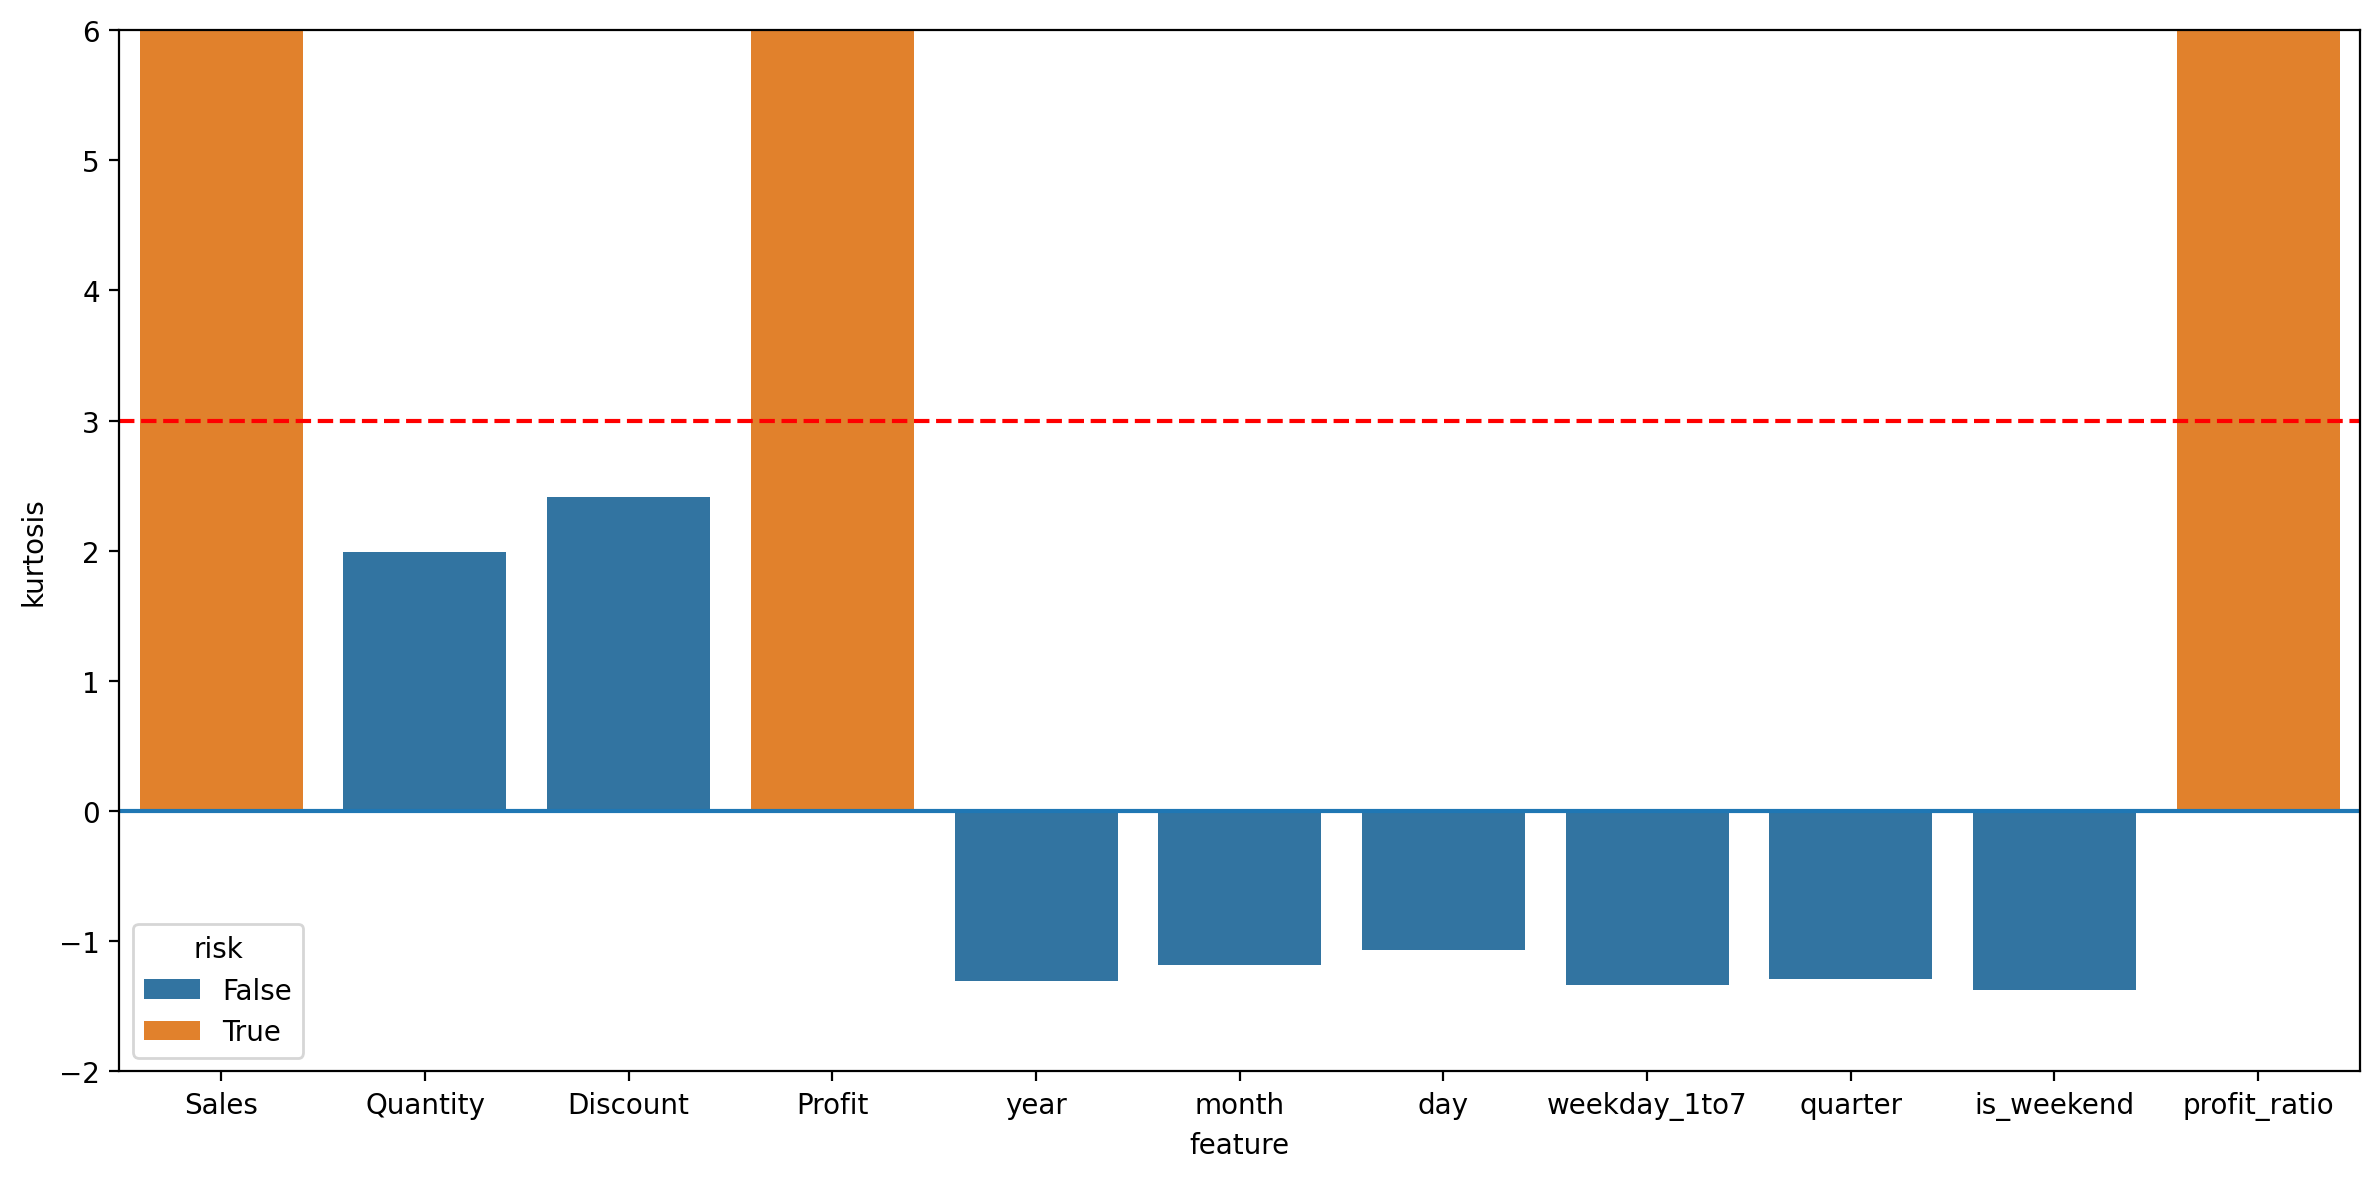

In [12]:
kurt_df['risk'] = kurt_df['kurtosis'] > 3

plt.figure(figsize = (12,6),dpi = 200)
sns.barplot(
    x='feature',
    y='kurtosis',
    data=kurt_df,
    hue='risk',
    errorbar=None
)

plt.axhline(0)
plt.axhline(3, linestyle='--', c ='red')
plt.ylim(-2, 6)  
plt.tight_layout()
plt.show()


In [13]:
cols = [
    'Region',
    'City',
    'Country',
    'State',
    'Category',
    'Sub-Category','weekday_name','Product_ID',
    'Product_Name','is_weekend','weekday_1to7','day',
    'Segment','quarter','month','year','Postal_Code','Ship_Mode']

df[cols] = df[cols].astype('category')

In [14]:
df.loc[:,'Country'].value_counts()

Country
United States    9993
Name: count, dtype: int64

The country is only 'United States'. The full data is related to only United States.I will drop it.

In [15]:
df = df.drop('Country', axis=1)

In [16]:
df.describe(include = "object")

,Order_ID,Order_Date,Ship_Date,Customer_ID,Customer_Name
count,9993,9993,9993,9993,9993
unique,5009,1237,1334,793,793
top,CA-2017-100111,2016-05-09,2015-12-16,WB-21850,William Brown
freq,14,38,35,37,37


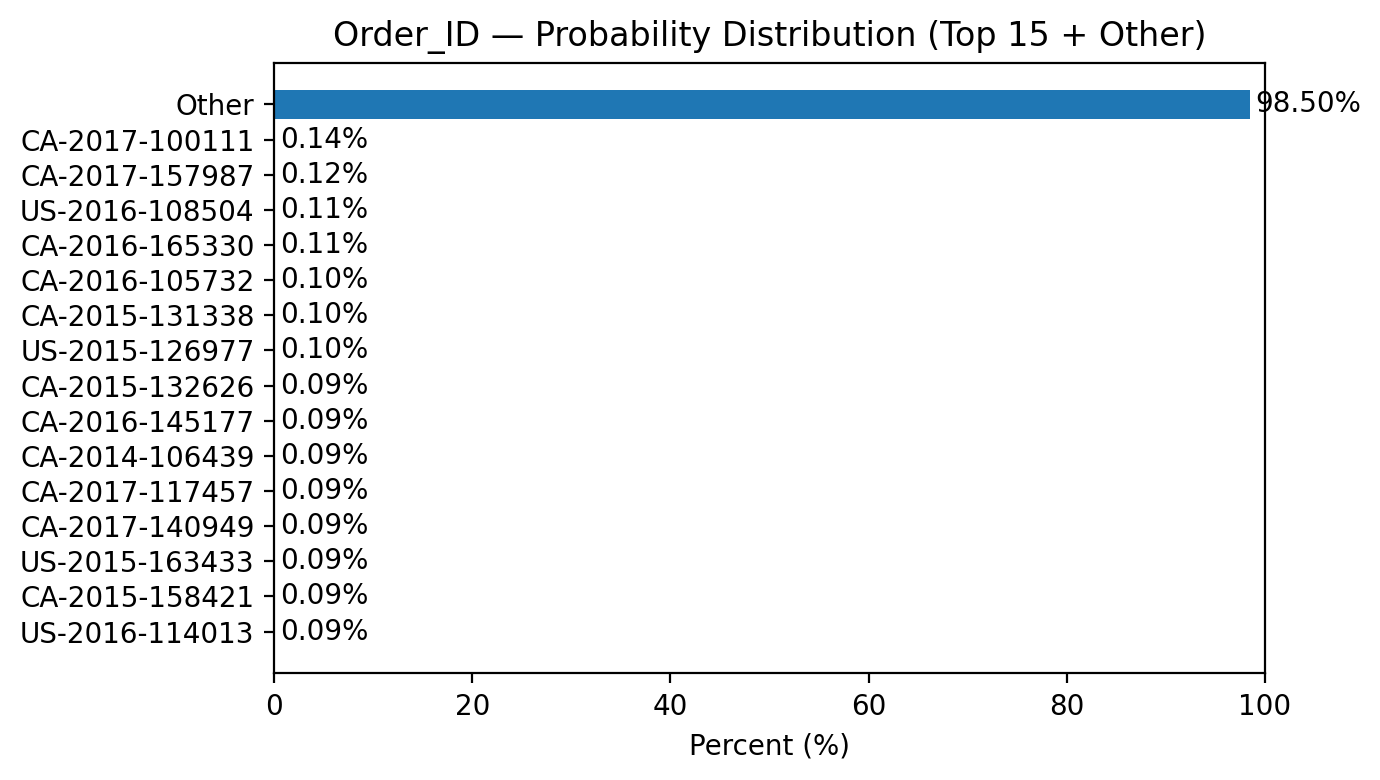

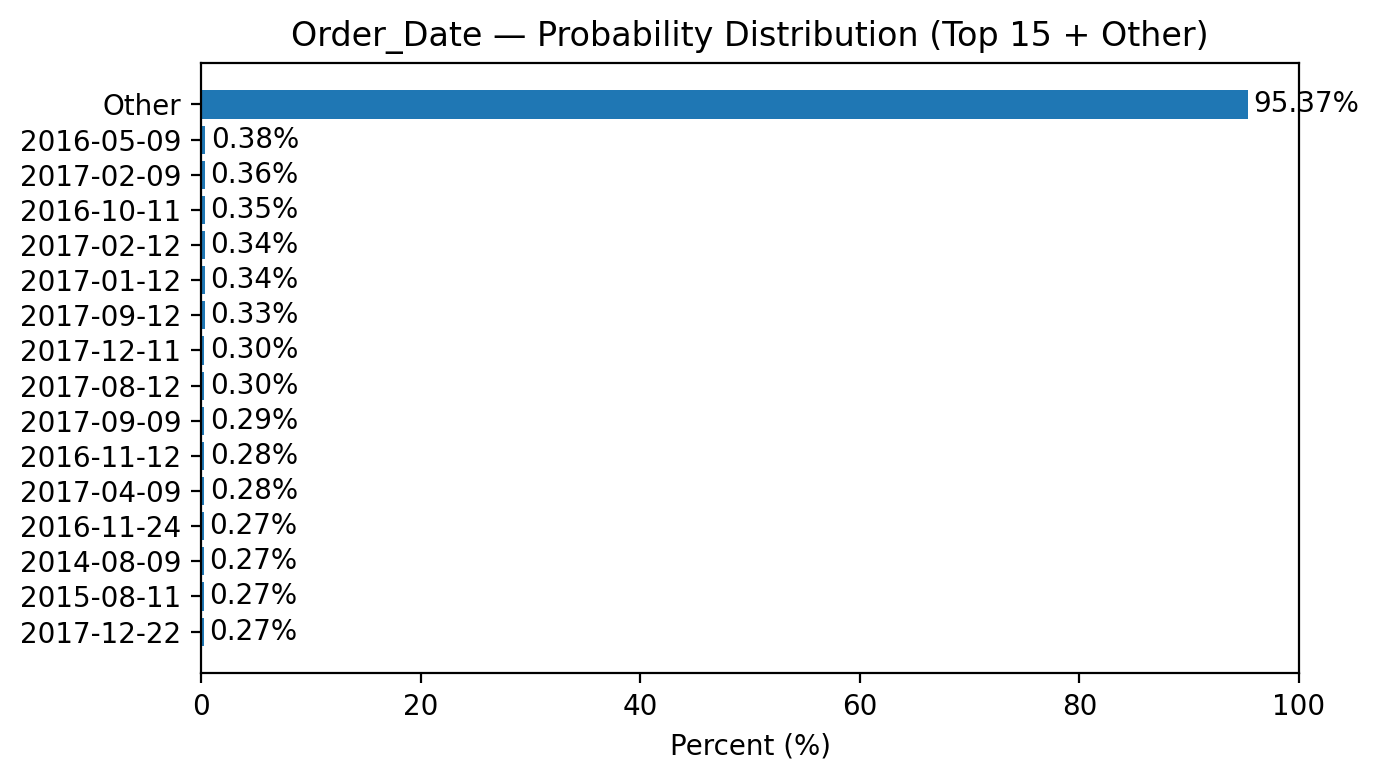

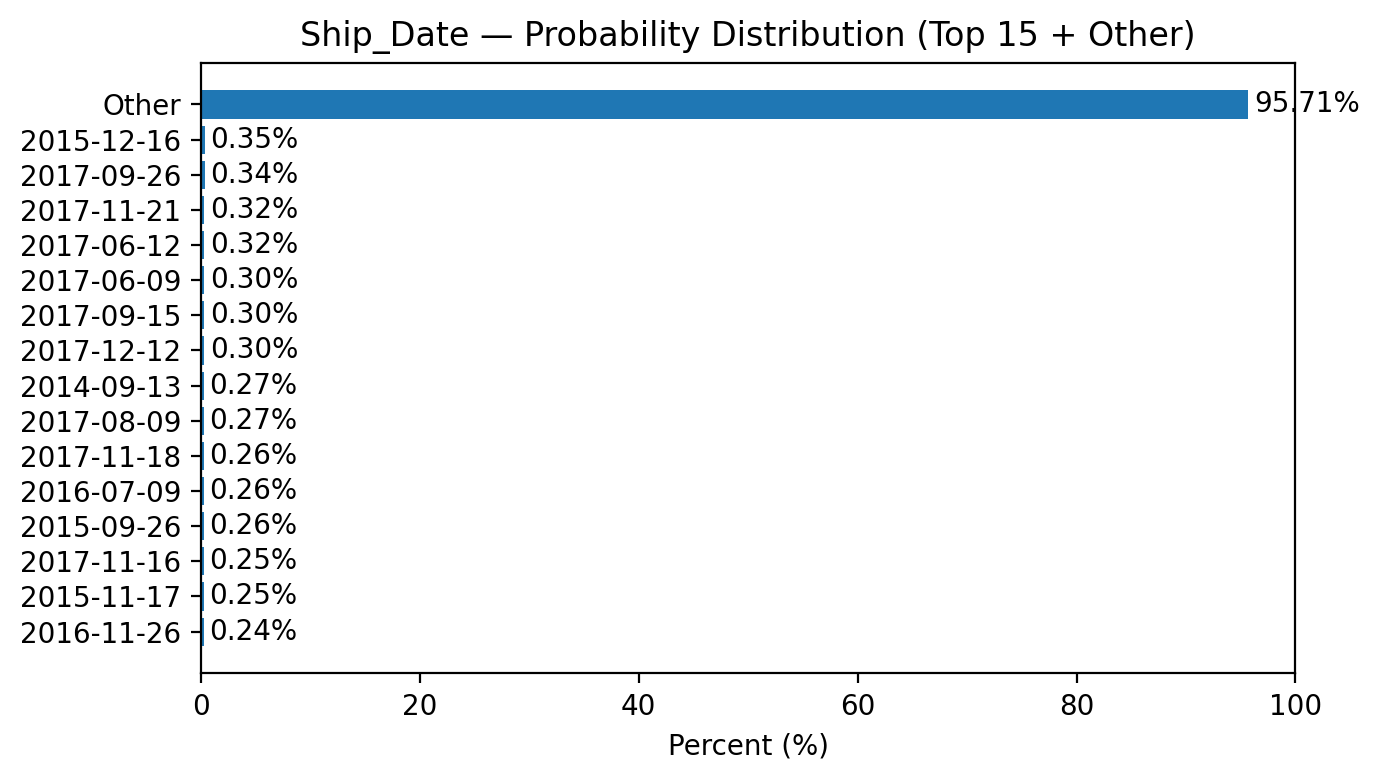

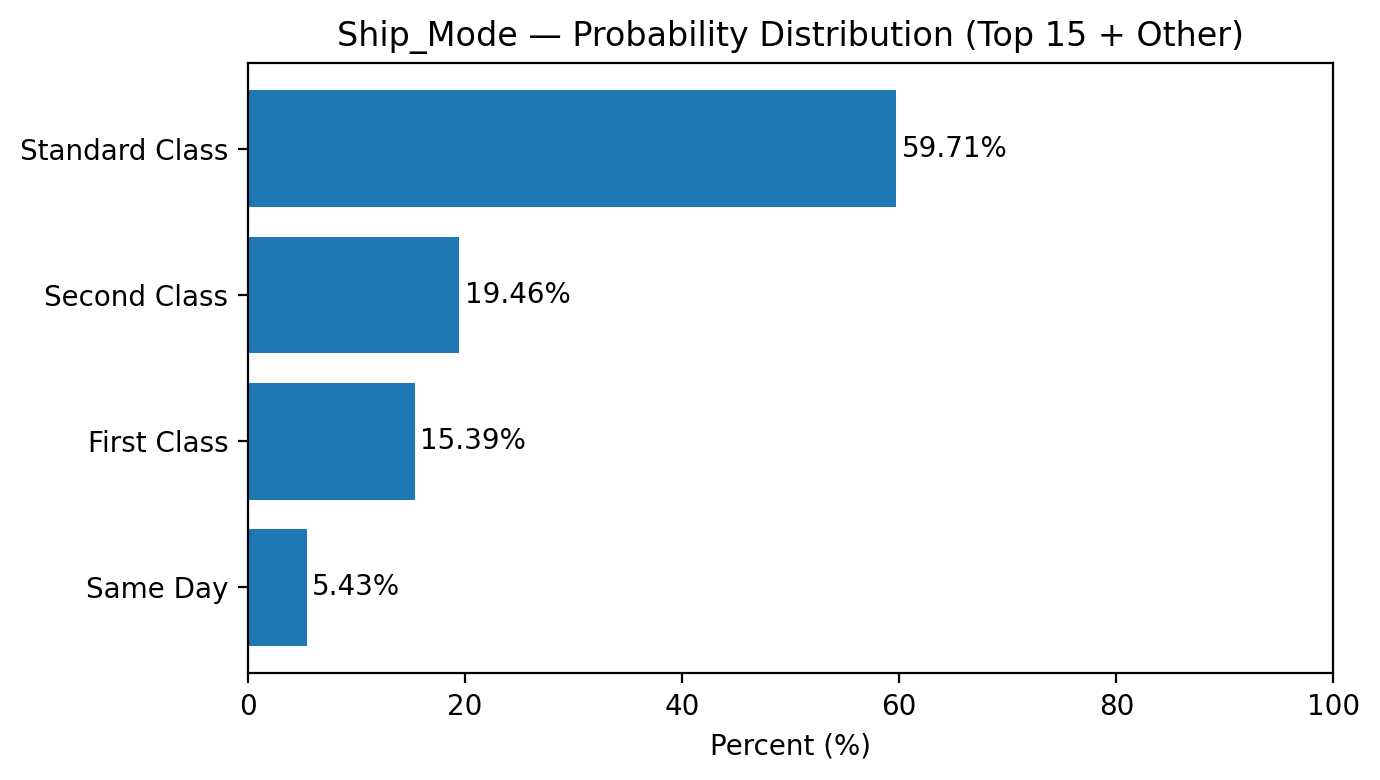

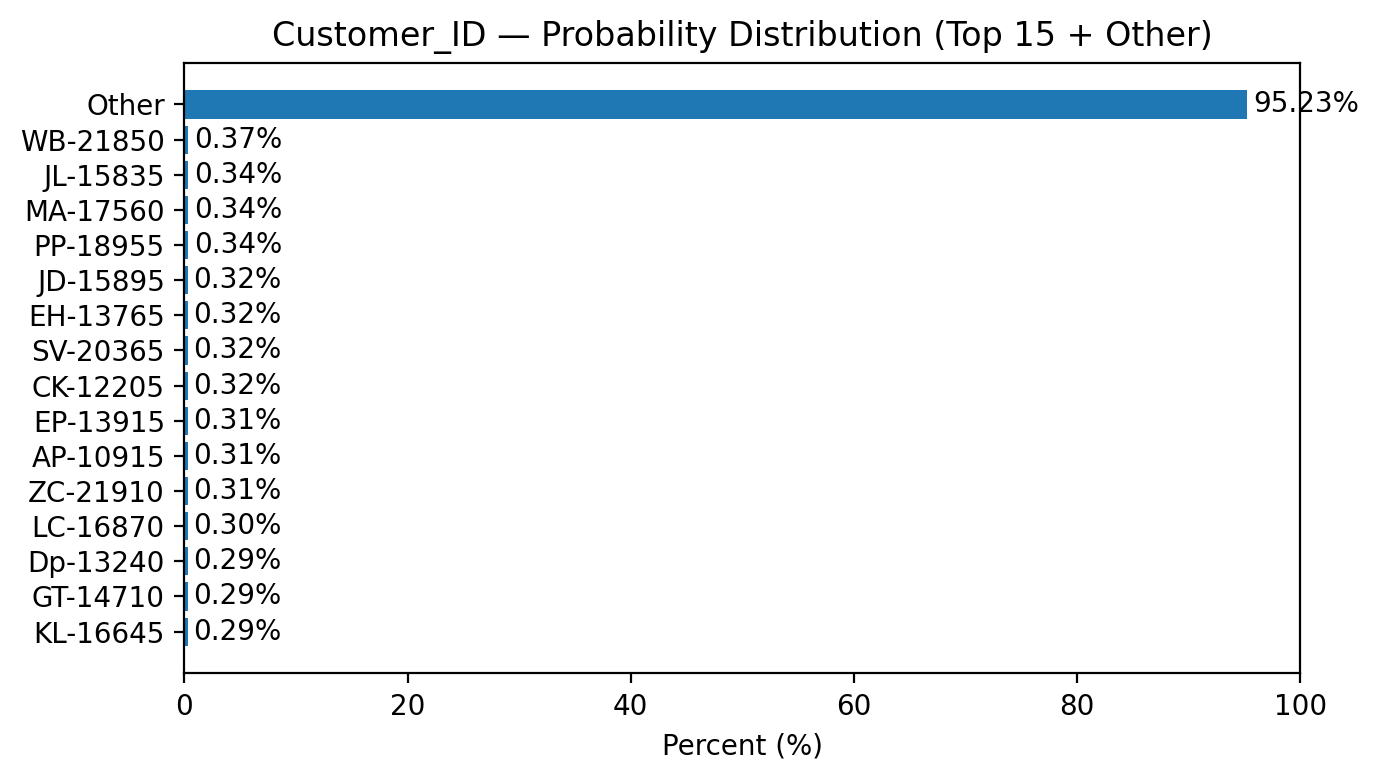

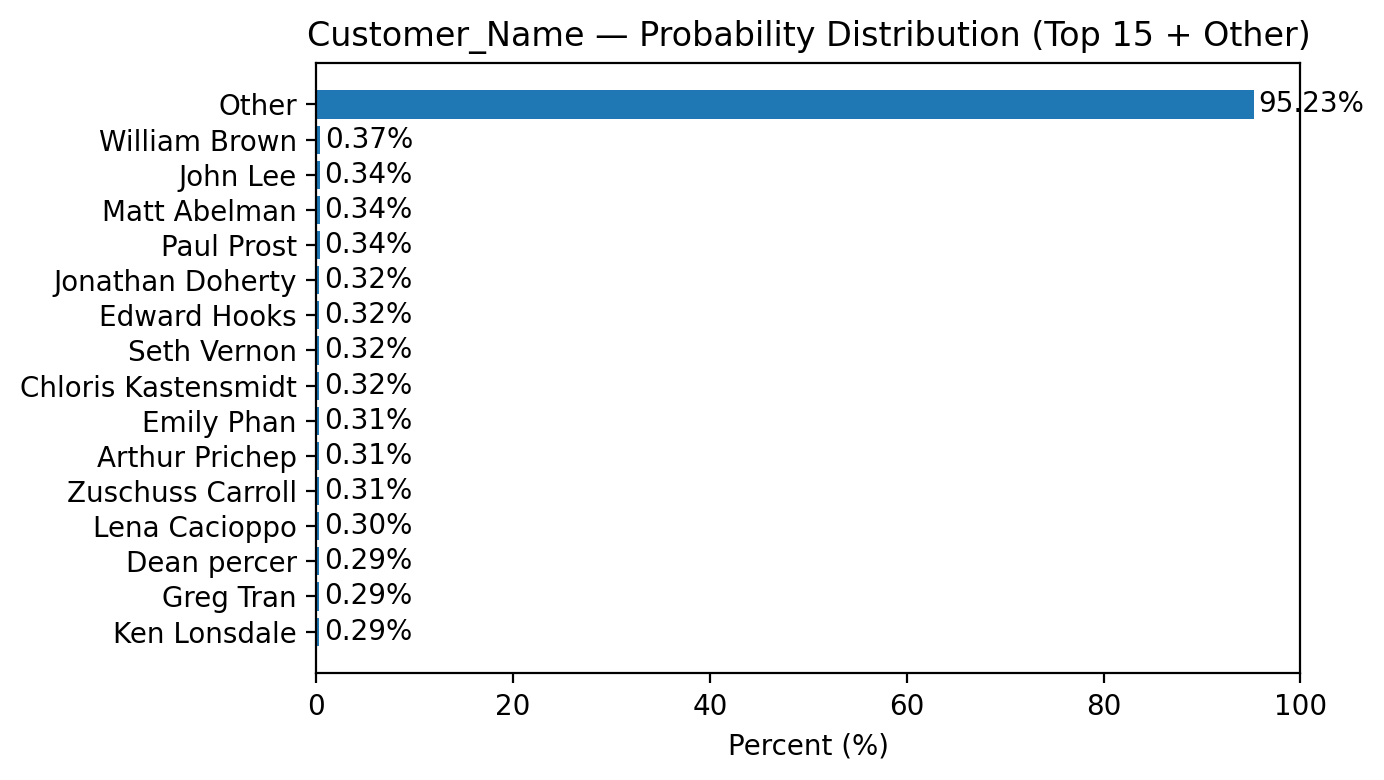

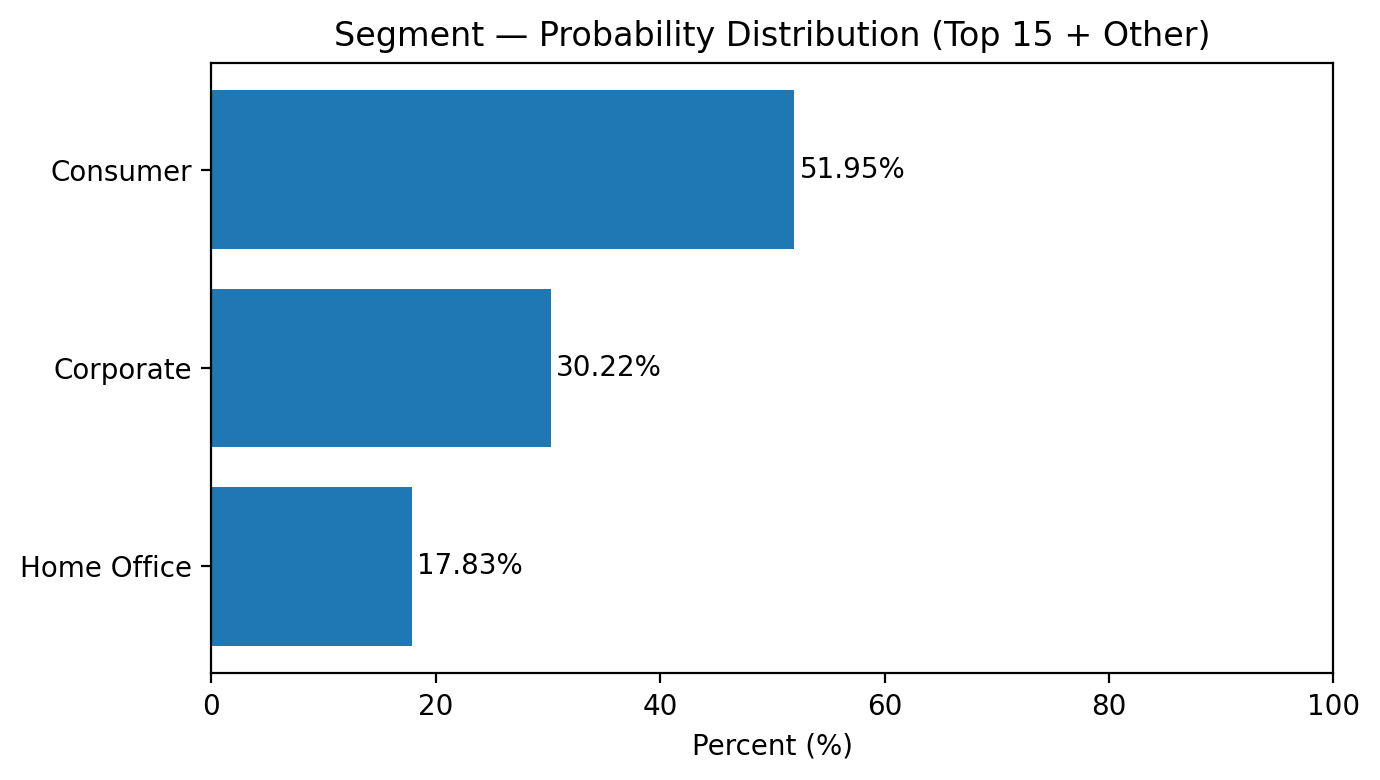

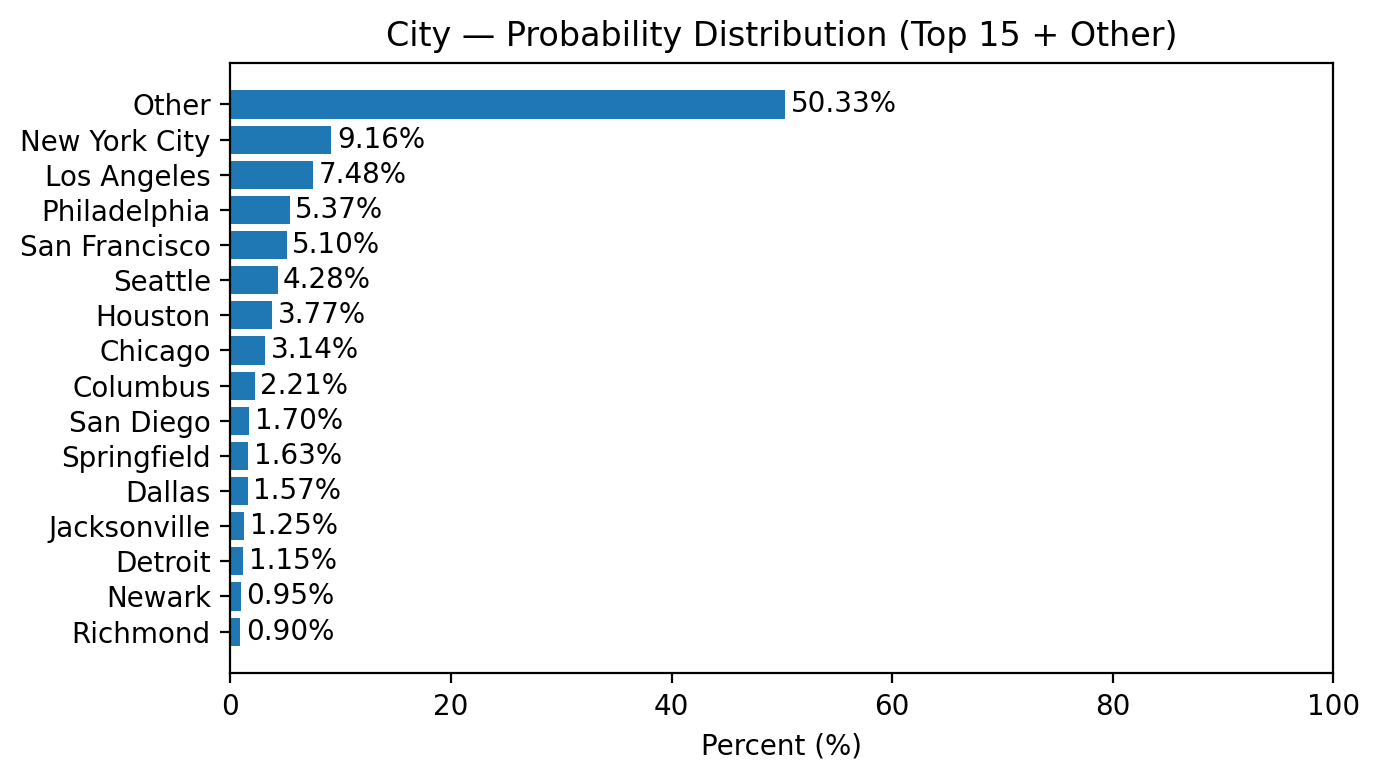

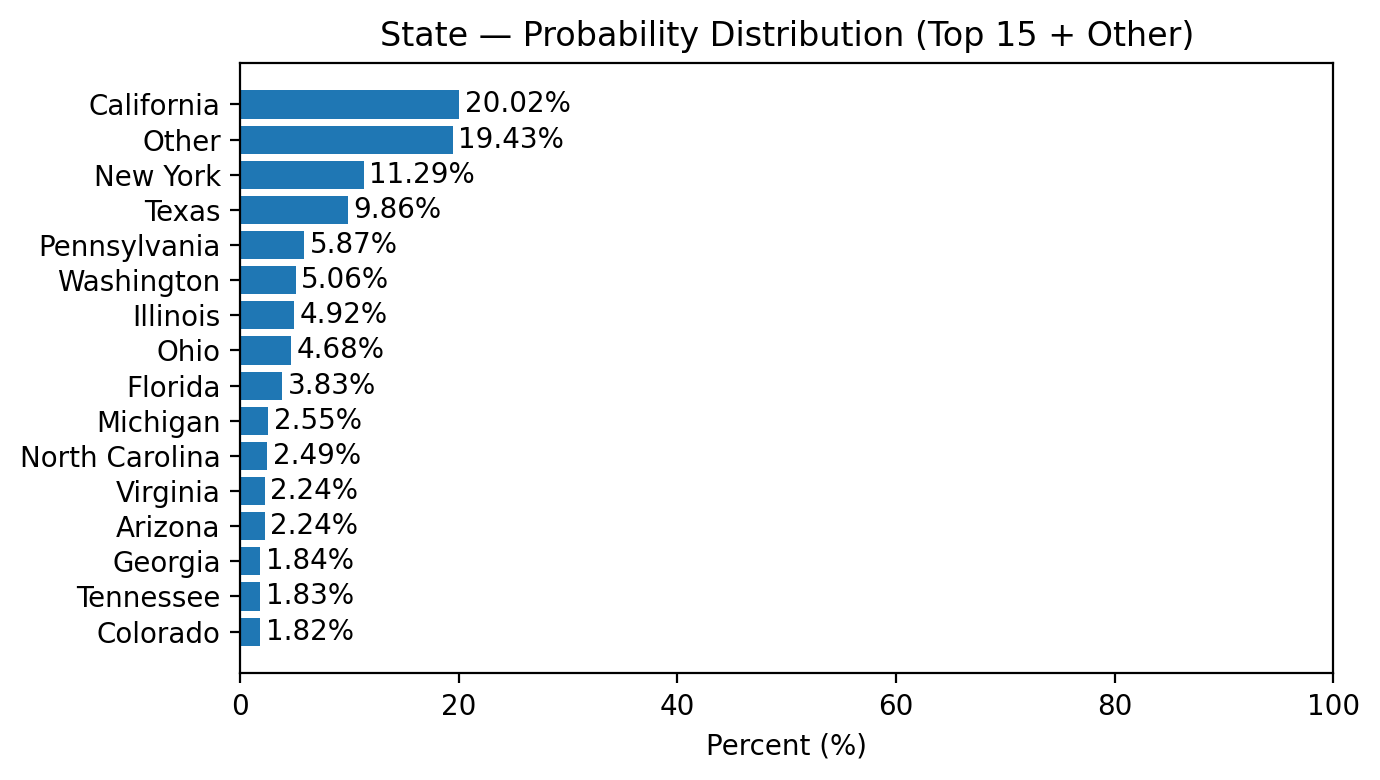

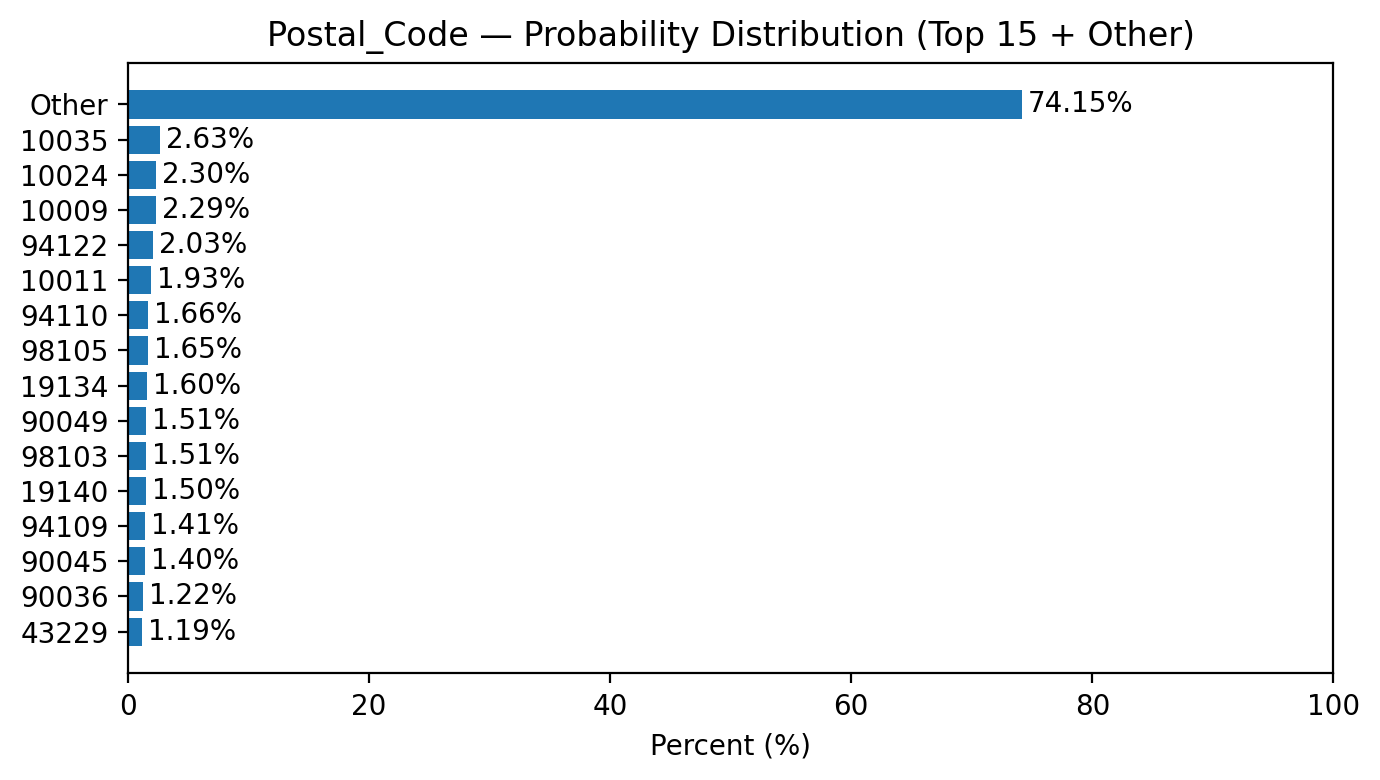

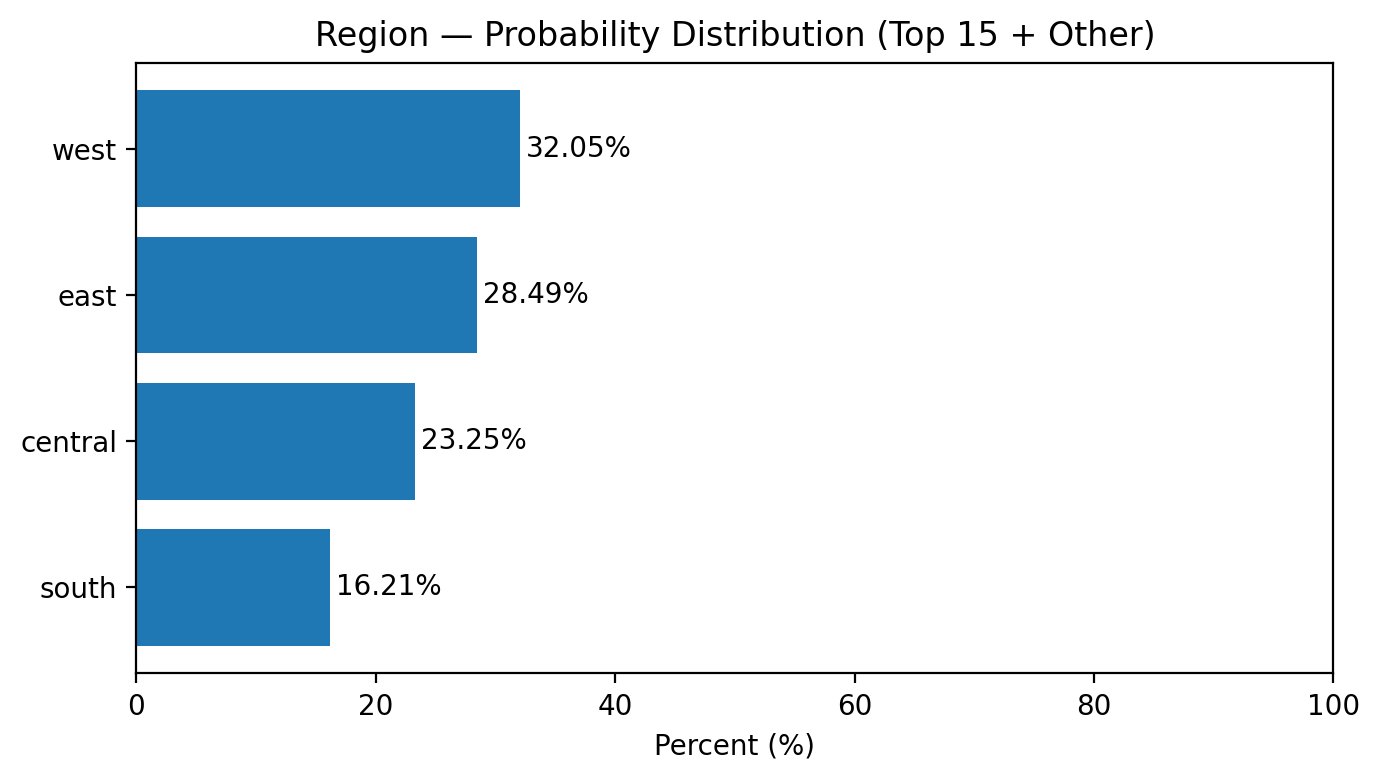

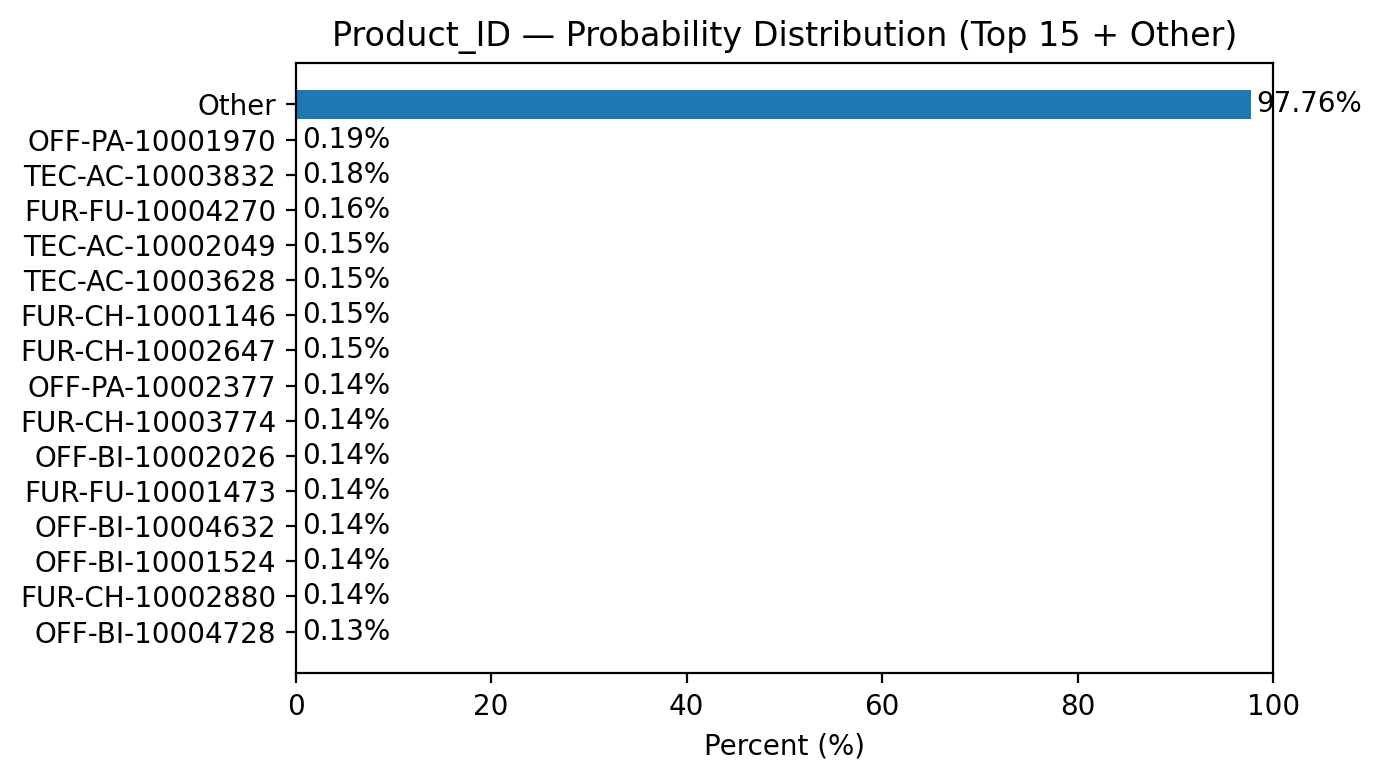

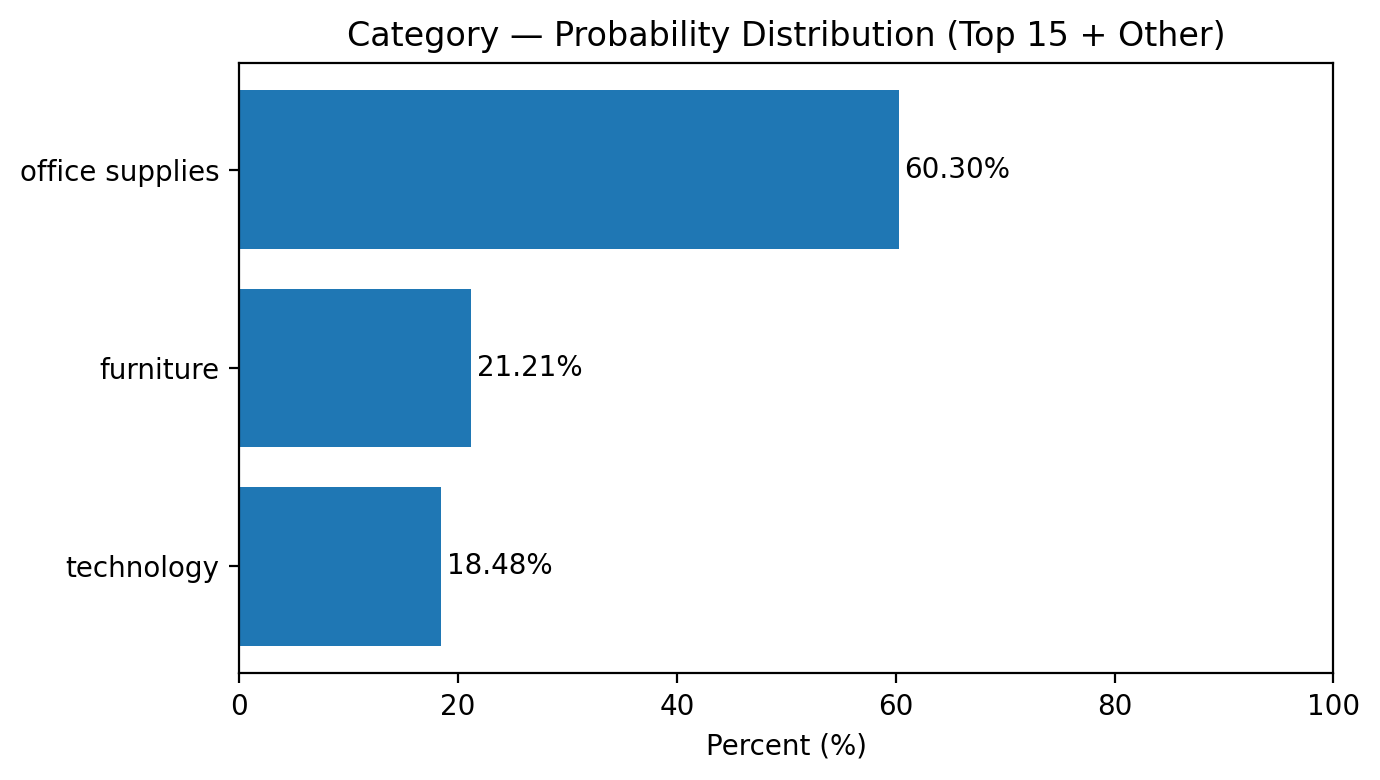

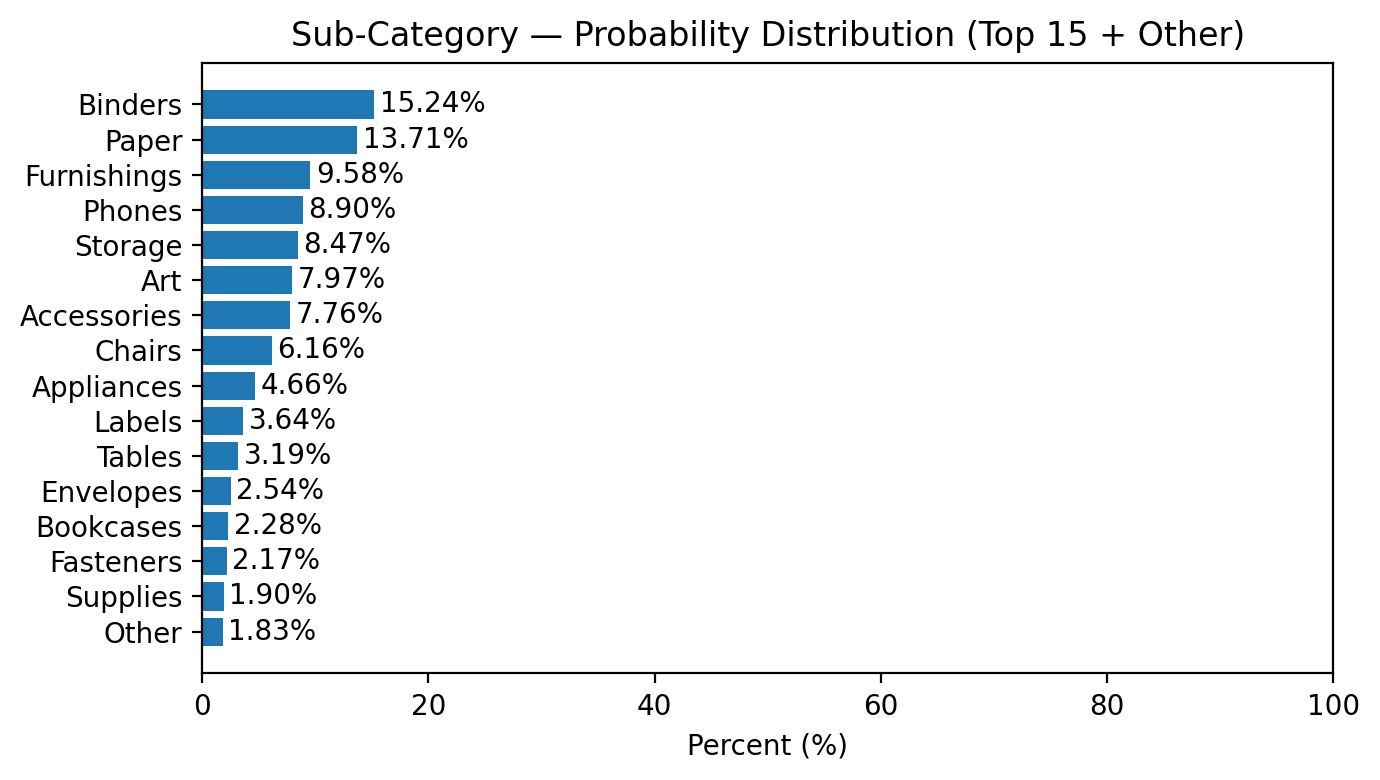

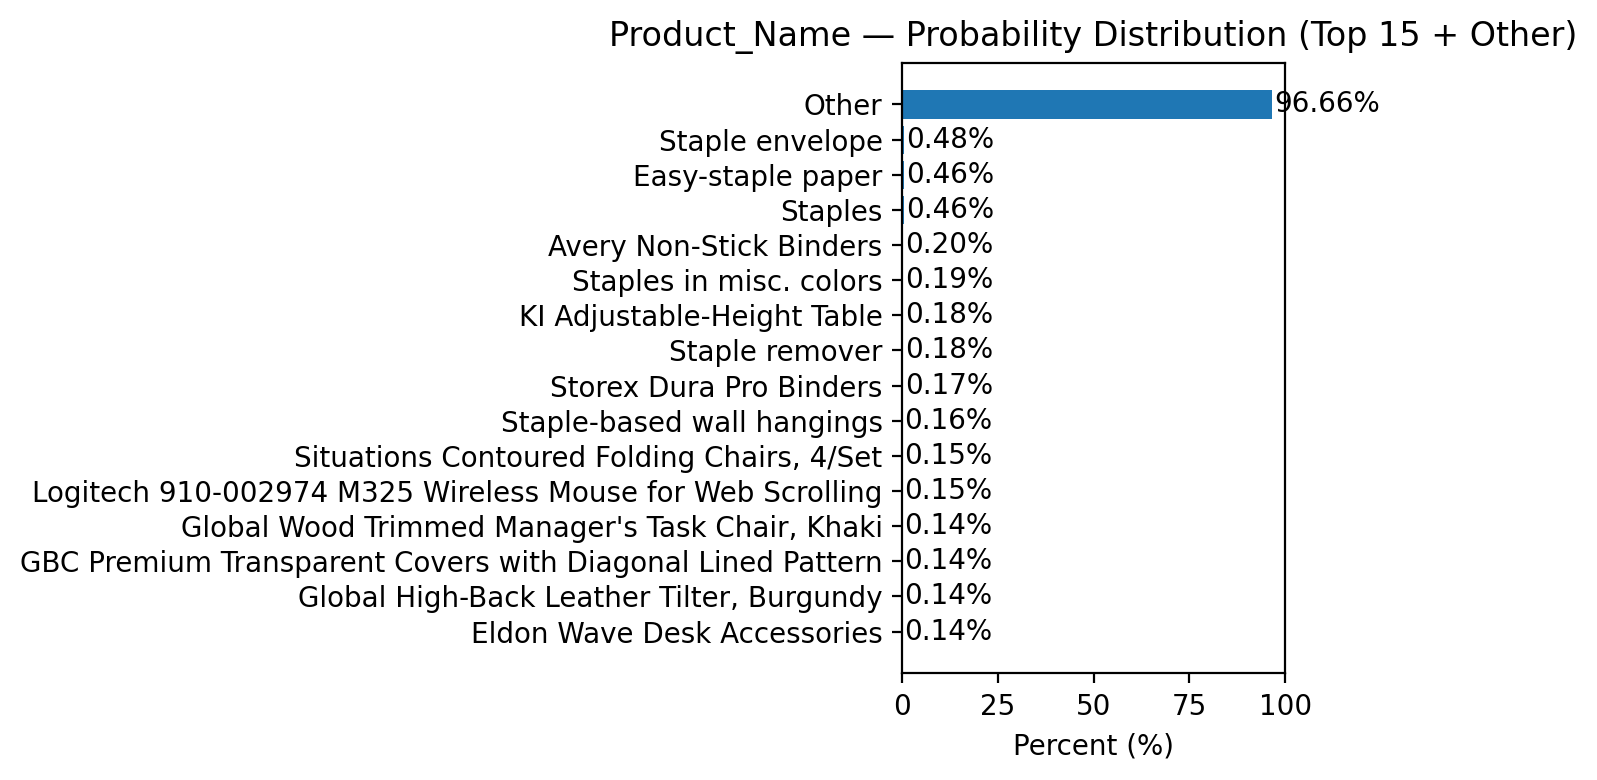

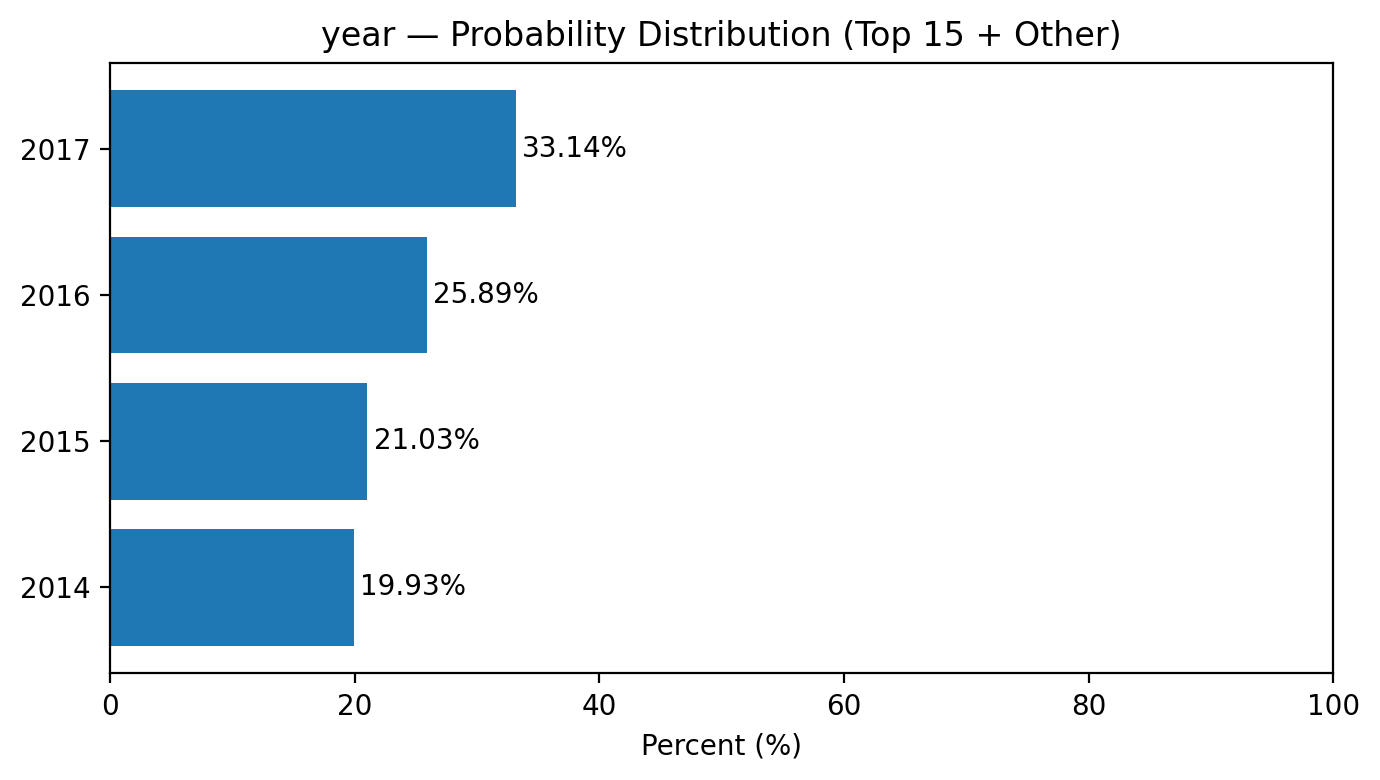

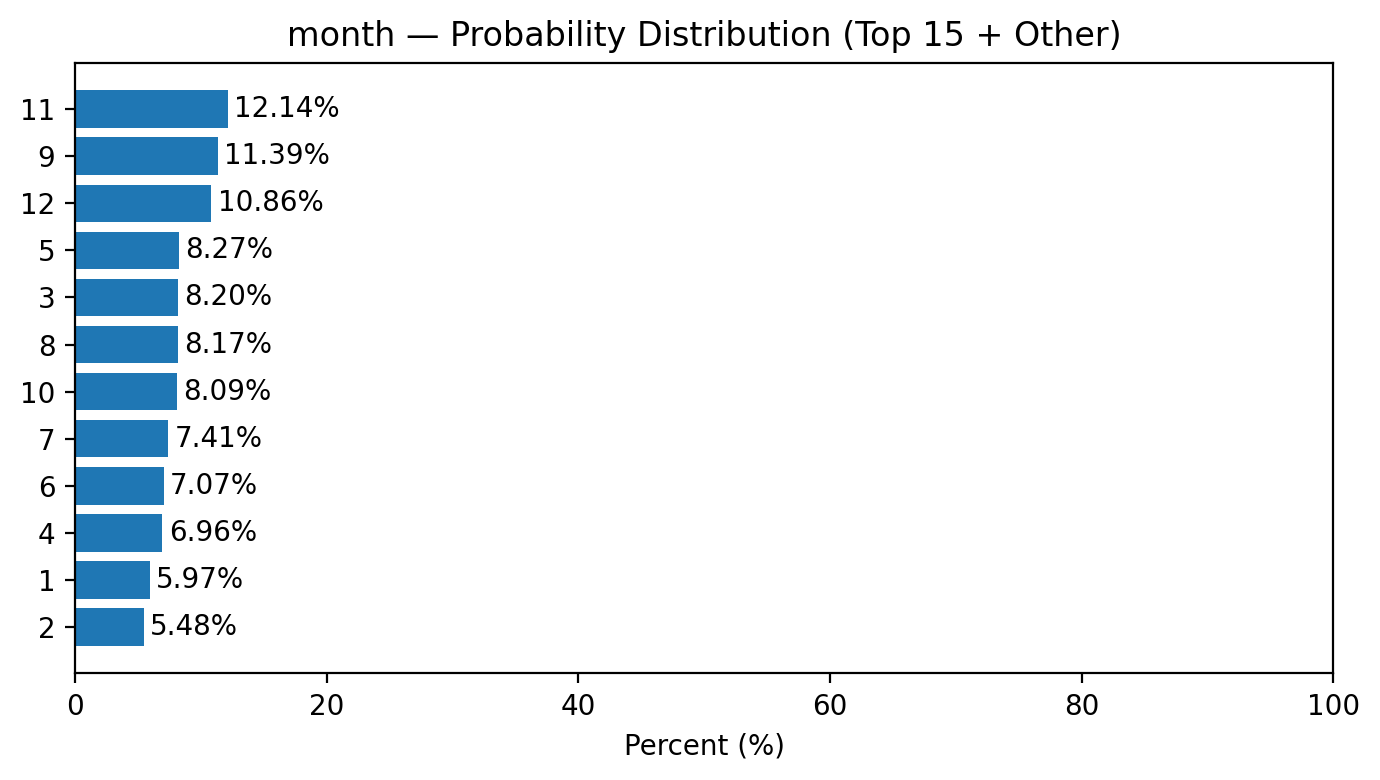

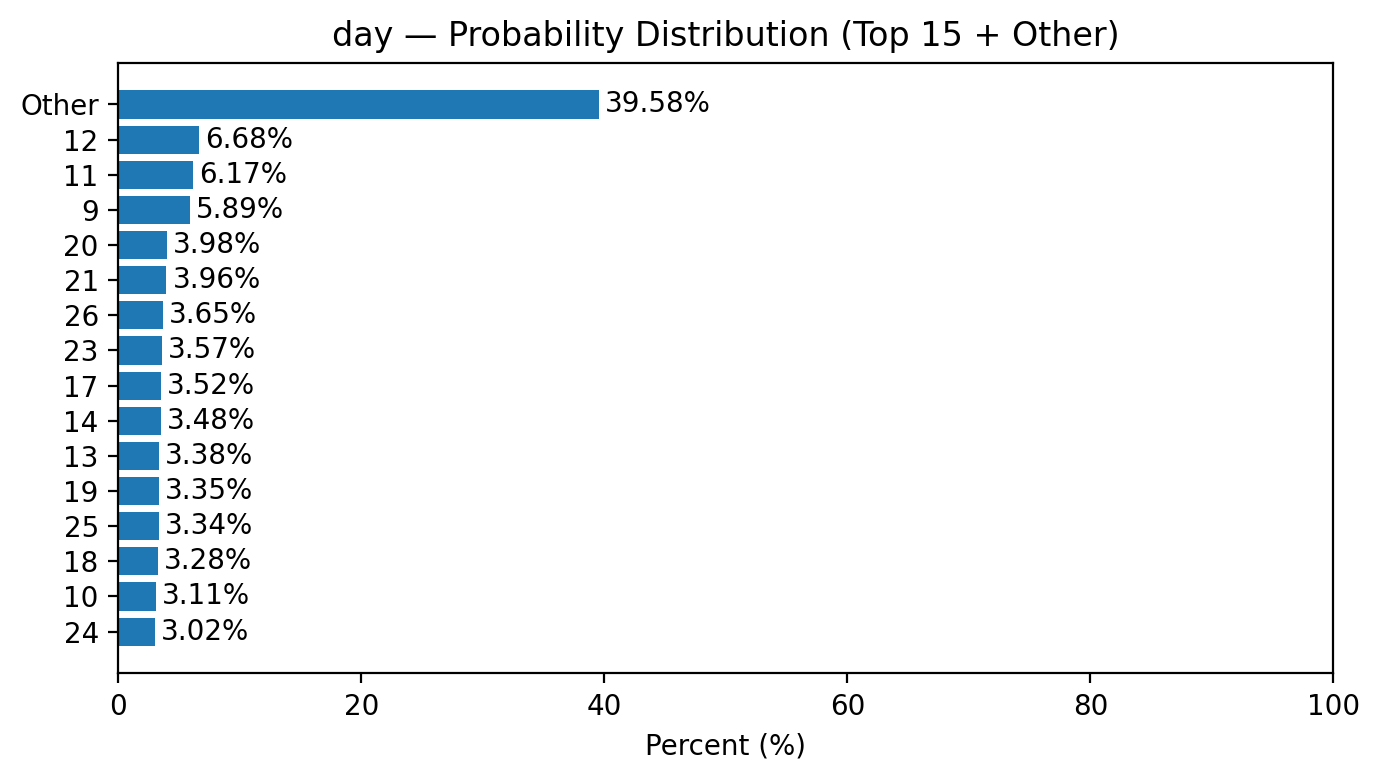

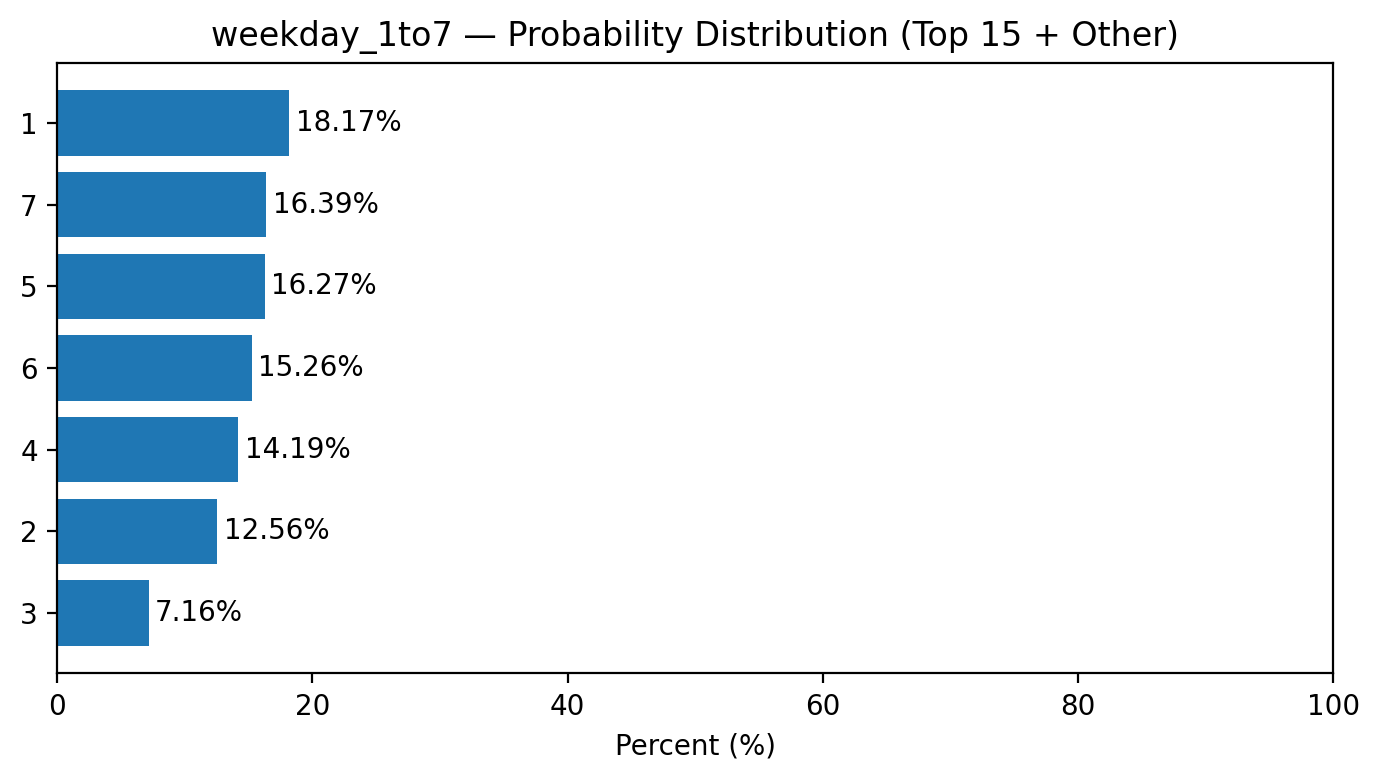

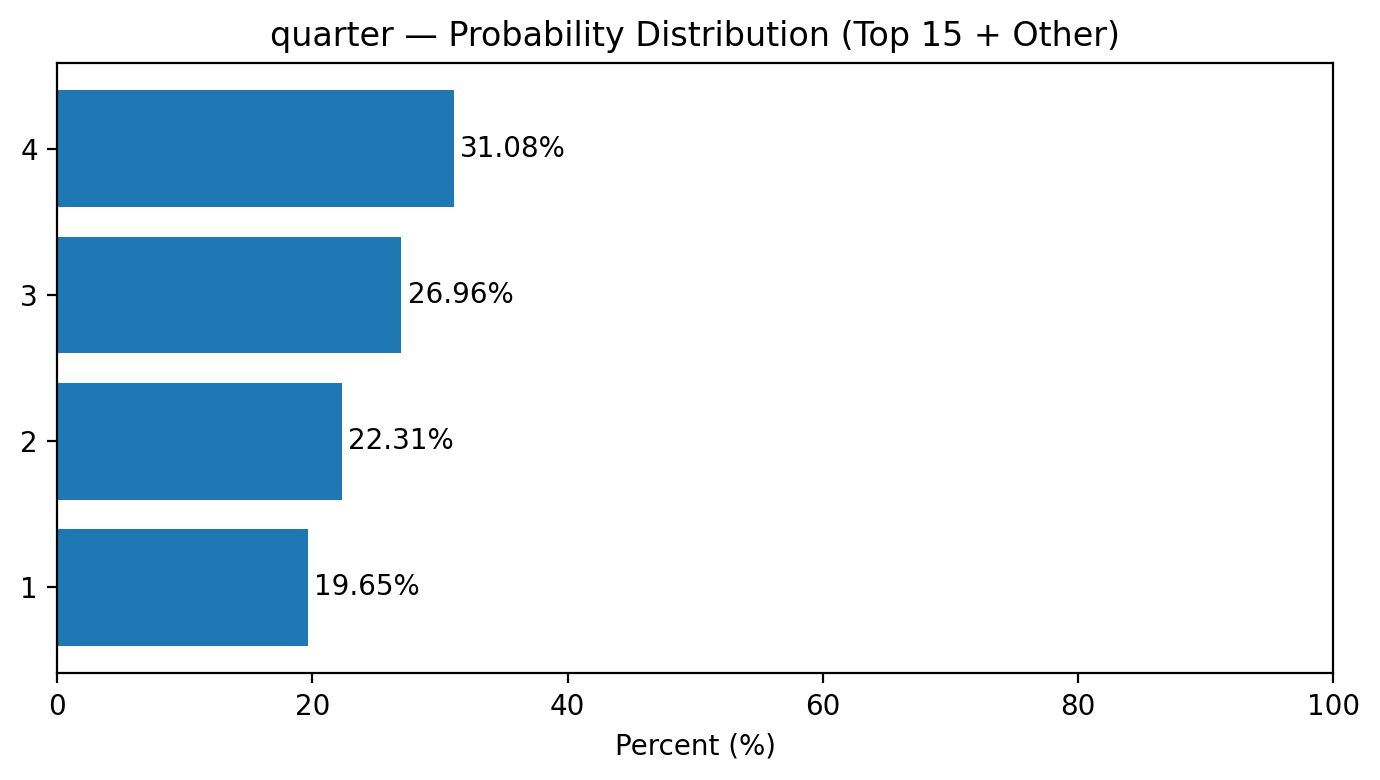

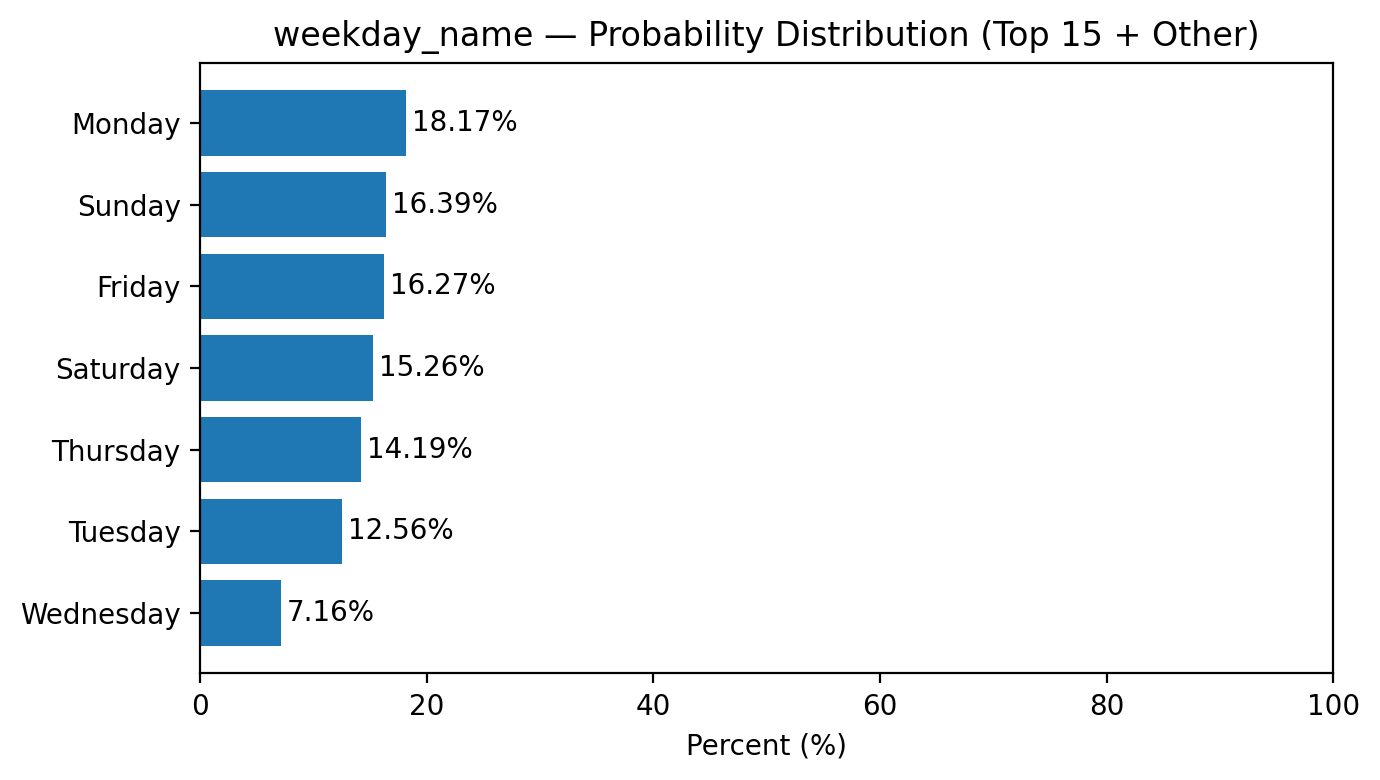

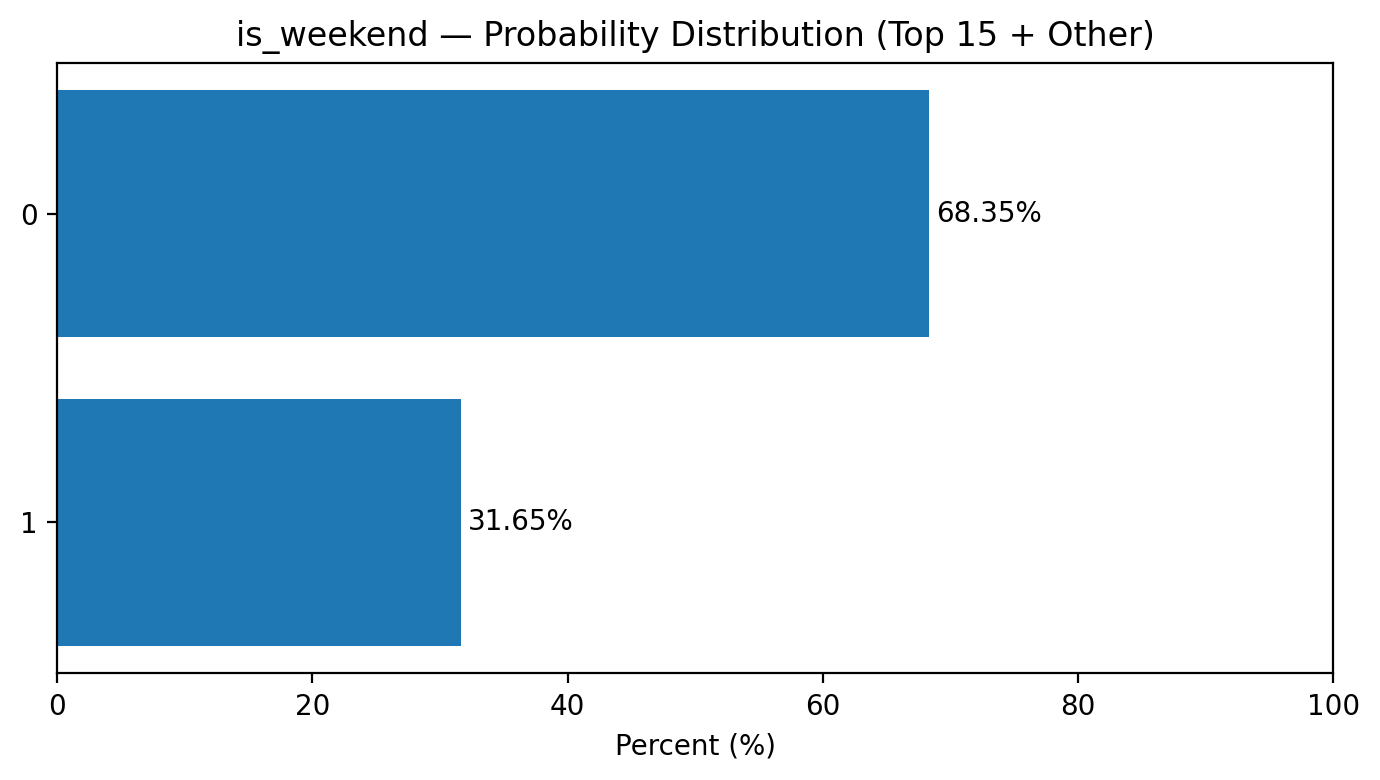

In [17]:
TOP_N = 15
cat_cols = df.select_dtypes(include=['category', 'object']).columns


def plot_top_pmf_fast(series, top_n=15):

    vc = series.value_counts(normalize=True) * 100

    if len(vc) > top_n:
        top = vc.iloc[:top_n]
        other_sum = vc.iloc[top_n:].sum()
        freq = pd.concat([top, pd.Series({'Other': other_sum})])
    else:
        freq = vc

    freq = freq.sort_values()

    fig, ax = plt.subplots(figsize=(7, 4), dpi=200)

    ax.barh(freq.index.astype(str), freq.values)

    for i, v in enumerate(freq.values):
        ax.text(v + 0.5, i, f"{v:.2f}%", va='center')

    ax.set_title(f"{series.name} — Probability Distribution (Top {top_n} + Other)")
    ax.set_xlabel("Percent (%)")
    ax.set_xlim(0, 100)

    plt.tight_layout()
    plt.show()
    plt.close(fig)


for col in cat_cols:
    plot_top_pmf_fast(df[col], TOP_N)


##### Interpretation (5 sentences)

 - The chart shows the probability distribution (percentage share) of each category rather than raw counts, so the bars represent relative importance and are directly comparable across datasets.

 - The top 15 categories account for most of the observations, indicating that a small number of categories dominate the column.

- The “Other” bar aggregates the remaining low-frequency categories, revealing the long-tail portion of the distribution.

- A tall first bar indicates high concentration or dominance, while more evenly sized bars suggest a balanced or uniform distribution.

 - Overall, the plot helps identify major contributors, minor contributors, and whether the data are concentrated or dispersed, which guides further analysis or feature selection.

Quick reading guide (how to think when you see one)

 - Big first bar → dominance

- Big “Other” → long tail

- Few tall bars → concentrated

- Many similar bars → balanced

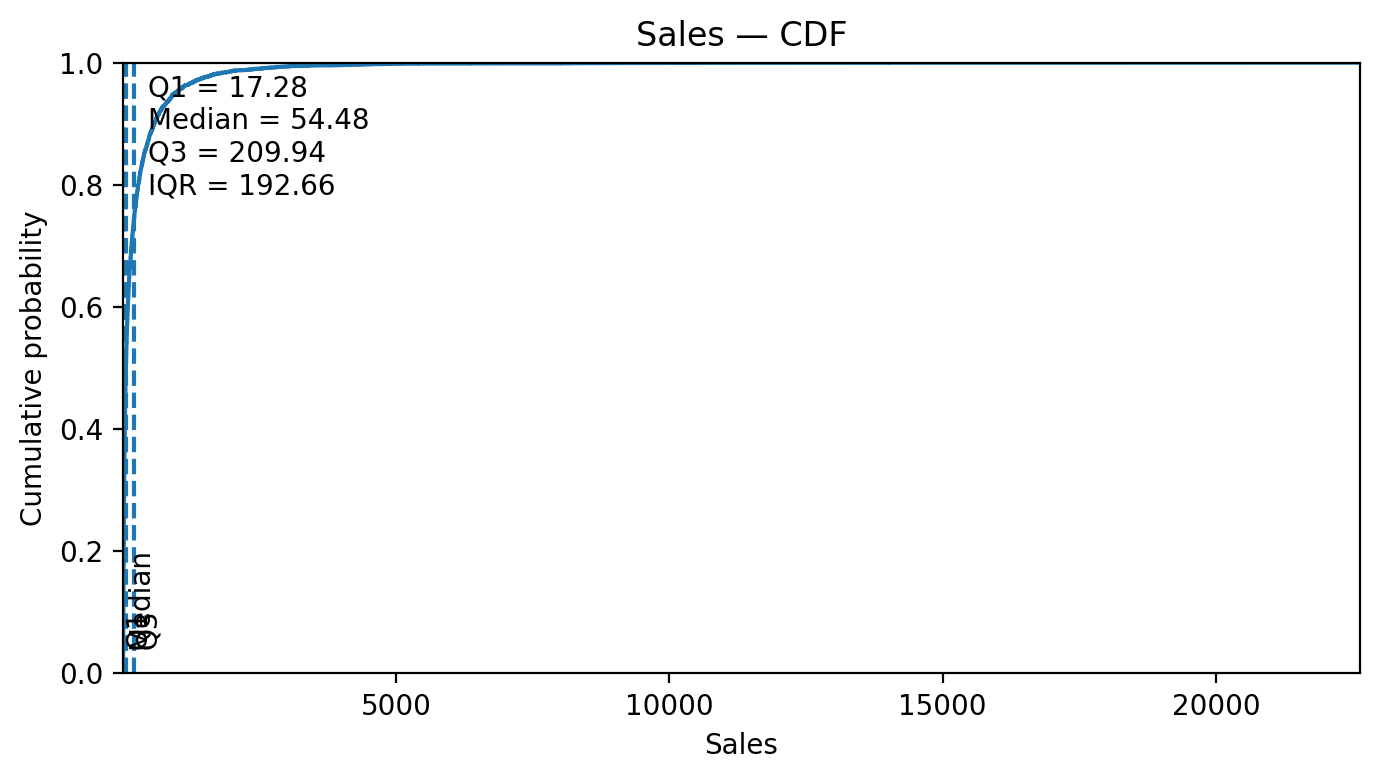

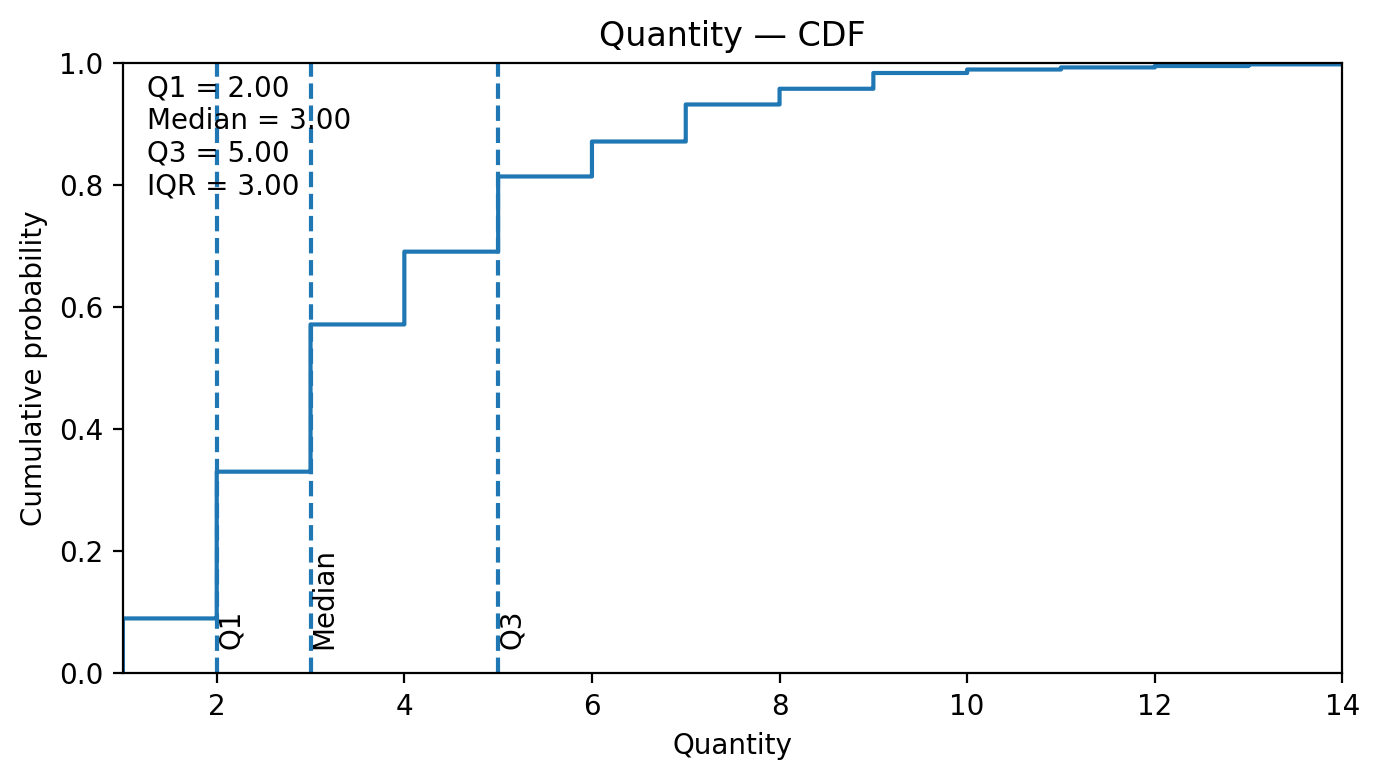

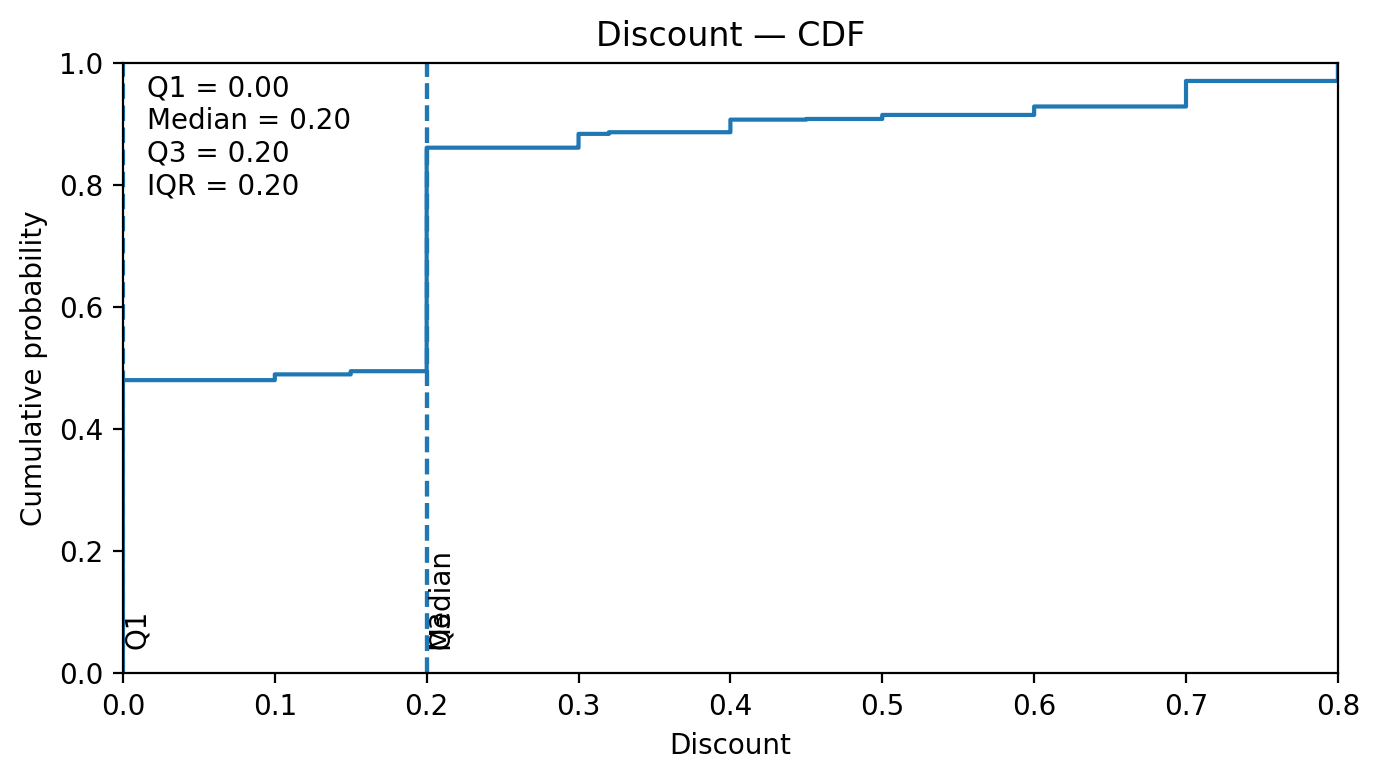

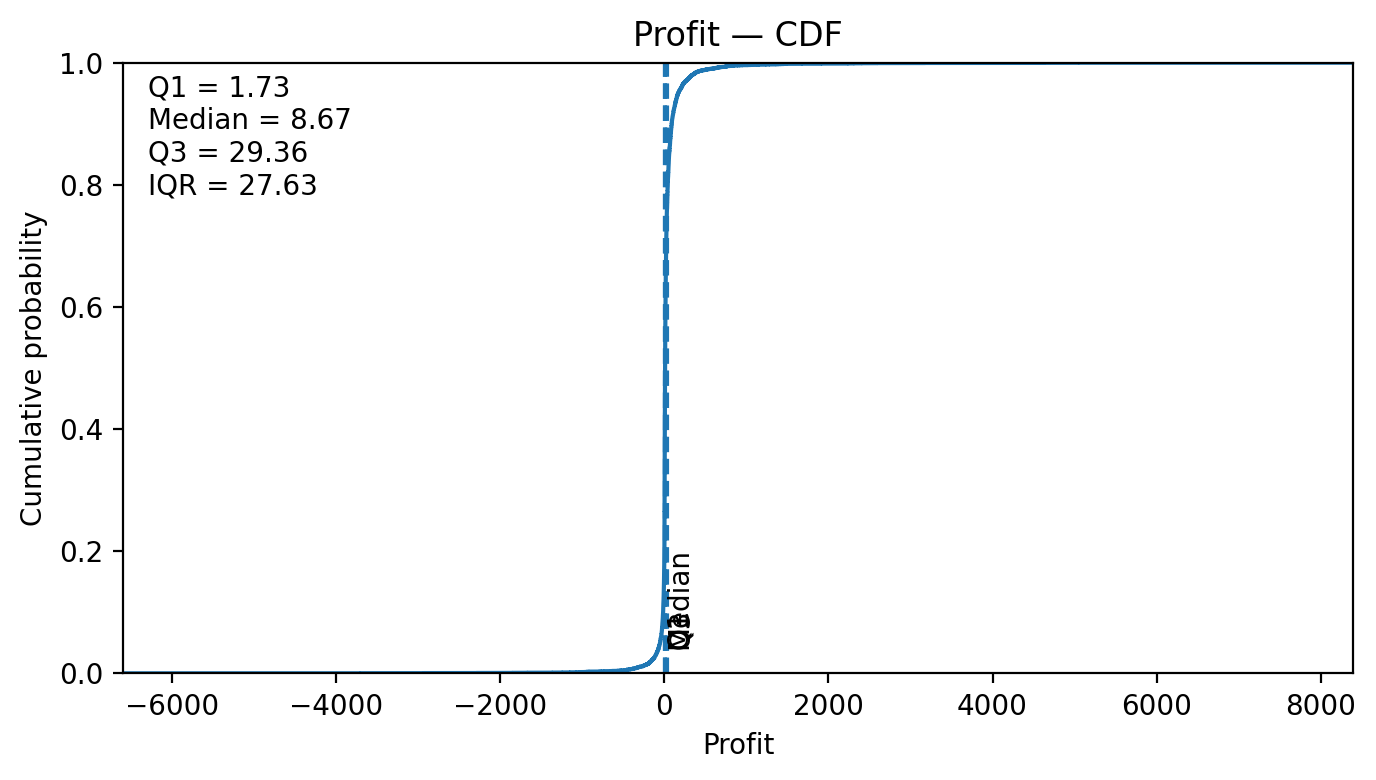

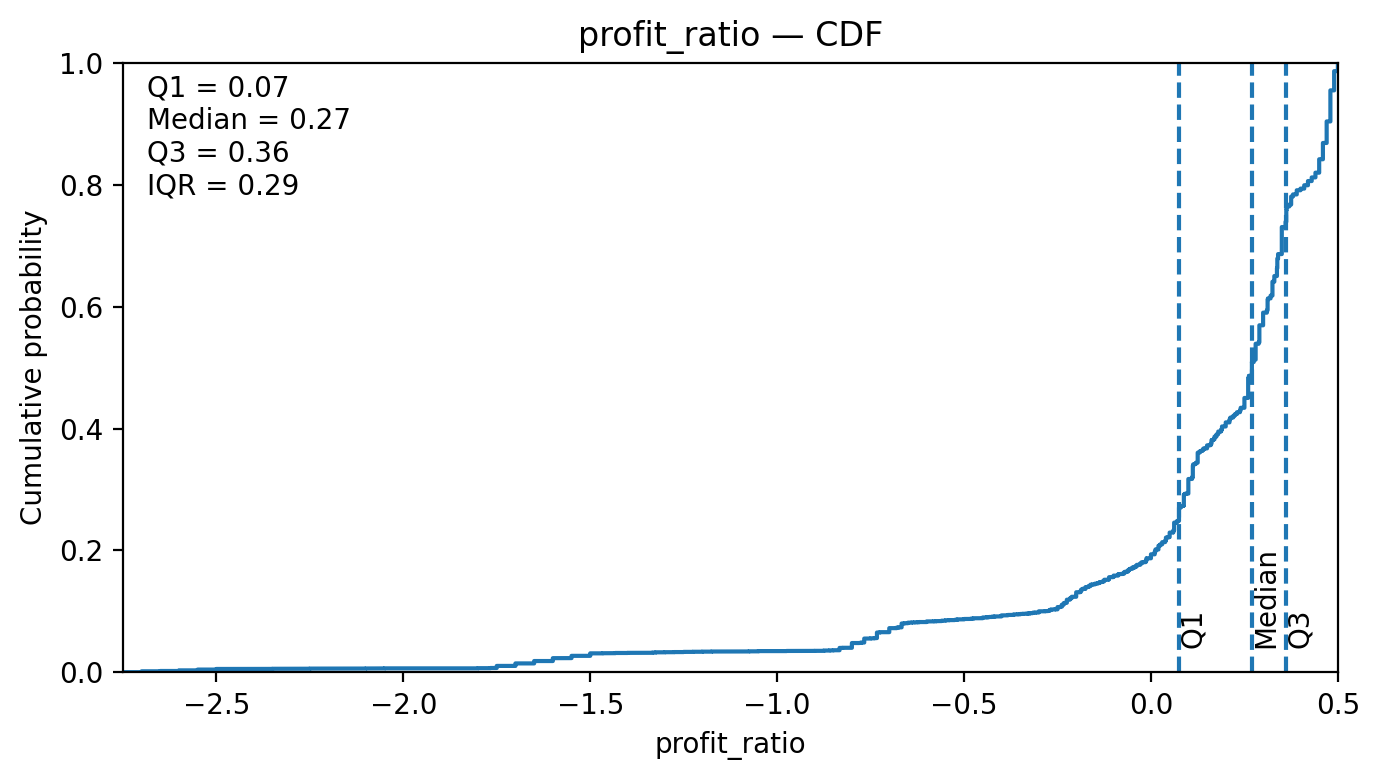

In [18]:
# SETTINGS
# ==============================
FIGSIZE = (7, 4)
DPI = 200


# ==============================
# CDF PLOT FUNCTION
# ==============================
def plot_cdf(series):

    x = series.dropna().values
    if len(x) == 0:
        return

    # in-place sort (memory efficient)
    x.sort()

    y = np.arange(1, len(x)+1) / len(x)

    # percentiles
    q1, median, q3 = np.percentile(x, [25, 50, 75])
    iqr = q3 - q1

    fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)

    # CDF line
    ax.step(x, y)

    # percentile lines
    ax.axvline(q1, linestyle="--")
    ax.axvline(median, linestyle="--")
    ax.axvline(q3, linestyle="--")

    # labels
    ax.text(q1, 0.05, "Q1", rotation=90)
    ax.text(median, 0.05, "Median", rotation=90)
    ax.text(q3, 0.05, "Q3", rotation=90)

    # stats box
    ax.text(
        0.02, 0.98,
        f"Q1 = {q1:.2f}\nMedian = {median:.2f}\nQ3 = {q3:.2f}\nIQR = {iqr:.2f}",
        transform=ax.transAxes,
        va="top"
    )

    ax.set_title(f"{series.name} — CDF")
    ax.set_xlabel(series.name)
    ax.set_ylabel("Cumulative probability")
    ax.set_ylim(0, 1)
    ax.set_xlim(left=x.min(), right=x.max())
    plt.tight_layout()
    plt.show()
    plt.close(fig)


# ==============================
# RUN FOR NUMERIC ONLY
# ==============================
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plot_cdf(df[col])


1. The CDF represents the **cumulative probability distribution**, showing the proportion of observations that fall at or below each value, which makes percentile-based interpretation straightforward.
2. The vertical markers at the **25th, 50th (median), and 75th percentiles** summarize the distribution’s location and spread, where the median indicates the typical value and the interquartile range (IQR) captures the middle 50% of the data. Example- If your score is in the 75th percentile, you scored higher than 75 students.
3. If the line goes up very quickly, it means many values are crowded into a small range, so most numbers are similar to each other. In other words, the data are tightly packed with little variation. If the line rises slowly and stretches across the graph, it means the values are more spread out over a wider range. This shows the data vary more and are less consistent from one observation to another.
4. Any **long flat tails or extended stretches** indicate extreme values or outliers, helping detect skewness or heavy-tailed behavior without relying on sensitive statistics like mean or standard deviation.
5. Overall, the CDF provides a **robust and comparable view of the distribution**, enabling clear estimation of probabilities, thresholds, and percentile cutoffs for decision-making.


In [23]:
from scipy import stats


# -------------------------------------------------
# Effect Size: Hedges' g (bias corrected Cohen's d)
# -------------------------------------------------
def hedges_g(x1, x2):
    x1, x2 = np.asarray(x1), np.asarray(x2)
    n1, n2 = len(x1), len(x2)

    if n1 < 2 or n2 < 2:
        return np.nan

    s1, s2 = x1.std(ddof=1), x2.std(ddof=1)

    pooled = np.sqrt(
        ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)
    )

    if pooled == 0:
        return 0.0

    d = (x1.mean() - x2.mean()) / pooled

    # Small sample correction (Hedges)
    correction = 1 - (3 / (4*(n1+n2) - 9))
    return d * correction


# -------------------------------------------------
# Faster Bootstrap CI (vectorized sampling)
# -------------------------------------------------
def bootstrap_ci(x1, x2, n_boot=2000, ci=95):
    x1 = np.asarray(x1)
    x2 = np.asarray(x2)

    effects = np.empty(n_boot)

    for i in range(n_boot):
        s1 = np.random.choice(x1, size=len(x1), replace=True)
        s2 = np.random.choice(x2, size=len(x2), replace=True)
        effects[i] = hedges_g(s1, s2)

    lower = np.percentile(effects, (100-ci)/2)
    upper = np.percentile(effects, 100 - (100-ci)/2)

    return lower, upper


# -------------------------------------------------
# Full Statistical Comparison (All Categorical)
# -------------------------------------------------
def effect_table_all_categories(
    df,
    numeric_cols=('Sales', 'Profit'),
    n_boot=2000,
    variance_flag_threshold=2,
    max_levels=30   # safety limit
):

    results = []

    # 1️⃣ Automatically select categorical columns
    categorical_cols = df.select_dtypes(include='category').columns

    # 2️⃣ Keep only columns with reasonable number of levels
    categorical_cols = [
        col for col in categorical_cols
        if df[col].nunique() <= max_levels
    ]

    for cat in categorical_cols:

        levels = df[cat].dropna().unique()

        for level in levels:

            mask = df[cat] == level

            for num in numeric_cols:

                if num not in df.columns:
                    continue

                x1 = df.loc[mask, num].dropna()
                x2 = df.loc[~mask, num].dropna()

                if len(x1) < 2 or len(x2) < 2:
                    continue

                g = hedges_g(x1, x2)

                # Welch t-test
                _, p_val = stats.ttest_ind(
                    x1, x2, equal_var=False
                )

                # Bootstrap CI
                ci_low, ci_high = bootstrap_ci(
                    x1.values, x2.values, n_boot=n_boot
                )

                # Variance ratio
                var1 = x1.var(ddof=1)
                var2 = x2.var(ddof=1)

                var_ratio = var1 / var2 if var2 != 0 else np.inf

                variance_flag = (
                    var_ratio > variance_flag_threshold or
                    var_ratio < 1/variance_flag_threshold
                )

                results.append({
                    "categorical_variable": cat,
                    "level": level,
                    "numeric_variable": num,
                    "n_group": len(x1),
                    "n_rest": len(x2),
                    "hedges_g": g,
                    "ci_lower": ci_low,
                    "ci_upper": ci_high,
                    "p_value_welch": p_val,
                    "variance_ratio": var_ratio,
                    "variance_flag": variance_flag
                })

    result_df = pd.DataFrame(results)

    # 3️⃣ Sort by strongest effect
    if not result_df.empty:
        result_df = result_df.sort_values(
            by="hedges_g",
            key=lambda x: np.abs(x),
            ascending=False
        )

    return result_df

In [28]:
stats_df = effect_table_all_categories(
    df,
    numeric_cols=('Sales', 'Profit'),
    n_boot=2000,
    max_levels=30  # prevents explosion from Product_ID etc.
)

In [30]:
pd.set_option('display.max_rows', 140)

In [32]:

stats_df

,categorical_variable,level,numeric_variable,n_group,n_rest,hedges_g,ci_lower,ci_upper,p_value_welch,variance_ratio,variance_flag
61,Sub-Category,Copiers,Profit,68,9925,3.531714,2.375361,4.768348,2.927911e-05,58.389824,True
60,Sub-Category,Copiers,Sales,68,9925,3.295177,2.276908,4.494295,2.498543e-06,34.036038,True
58,Sub-Category,Machines,Sales,115,9878,2.369821,1.707668,3.081497,1.854435e-07,27.195511,True
34,Sub-Category,Tables,Sales,319,9674,0.699469,0.548722,0.890613,3.464759e-29,0.990436,False
30,Sub-Category,Chairs,Sales,616,9377,0.521883,0.412613,0.663630,1.813536e-39,0.781680,False
24,Category,office supplies,Sales,6026,3967,-0.457725,-0.528331,-0.398331,5.969523e-82,0.205702,True
28,Sub-Category,Bookcases,Sales,228,9765,0.450850,0.312335,0.630953,3.409478e-10,1.056269,False
26,Category,technology,Sales,1847,8146,0.445072,0.390227,0.507286,8.533819e-25,6.673481,True
35,Sub-Category,Tables,Profit,319,9674,-0.372129,-0.519157,-0.252861,1.334665e-10,0.971784,False
54,Sub-Category,Fasteners,Sales,217,9776,-0.354539,-0.407107,-0.313156,7.405550e-245,0.000389,True


The strongest performance differences in the dataset come from specific product sub-categories.

Copiers show extremely large positive effects on both Sales and Profit.

Machines also demonstrate a very strong positive Sales effect.

These two sub-categories act as major financial outliers in the dataset.

Tables significantly increase Sales but reduce Profit.

Chairs moderately increase Sales and slightly improve Profit.

Bookcases increase Sales but slightly decrease Profit.

Technology as a category significantly boosts both Sales and Profit.

Furniture increases Sales moderately but slightly reduces Profit overall.

Office Supplies significantly reduce average Sales compared to other categories.

Fasteners show a strong negative Sales effect.

Art products also significantly reduce Sales compared to the rest.

Labels show a noticeable negative impact on Sales and Profit.

Paper reduces Sales but has only a very small impact on Profit.

Envelopes slightly reduce Sales and show almost no Profit difference.

Phones moderately increase both Sales and Profit.

Accessories slightly increase Profit but slightly reduce Sales.

Furnishings reduce both Sales and Profit moderately.

Storage slightly increases Sales but has minimal Profit impact.

Appliances show very small effects on both Sales and Profit.

Regional differences are generally very small.

The Central region shows a small but statistically significant decrease in Profit.

West, East, and South regions show negligible performance differences.

Customer segments (Consumer, Corporate, Home Office) show minimal influence on Sales and Profit.

Month-based differences are very small and mostly insignificant.

Weekday and weekend effects are negligible overall.

Quarter-based differences show only small variations in performance.

Year-to-year performance differences are extremely small.

Shipping methods show almost no meaningful impact on Sales or Profit.

Some categories display high variance, especially Copiers and Machines.

Large sample sizes make very small differences statistically significant.

Most small statistically significant effects are not practically meaningful.

Product type is the dominant structural driver of financial outcomes.

Geographic and temporal variables contribute very little to overall variation.

Overall, the dataset shows that what is sold matters far more than where, when, or how it is sold.

In [34]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() < 50:   # threshold
        df[col] = df[col].astype('category')

In [35]:
df.dtypes


Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode        category
Customer_ID        object
Customer_Name      object
Segment          category
City             category
State            category
Postal_Code      category
Region           category
Product_ID       category
Category         category
Sub-Category     category
Product_Name     category
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
year             category
month            category
day              category
weekday_1to7     category
quarter          category
weekday_name     category
is_weekend       category
profit_ratio      float64
dtype: object

In [36]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

<Figure size 2000x1600 with 0 Axes>

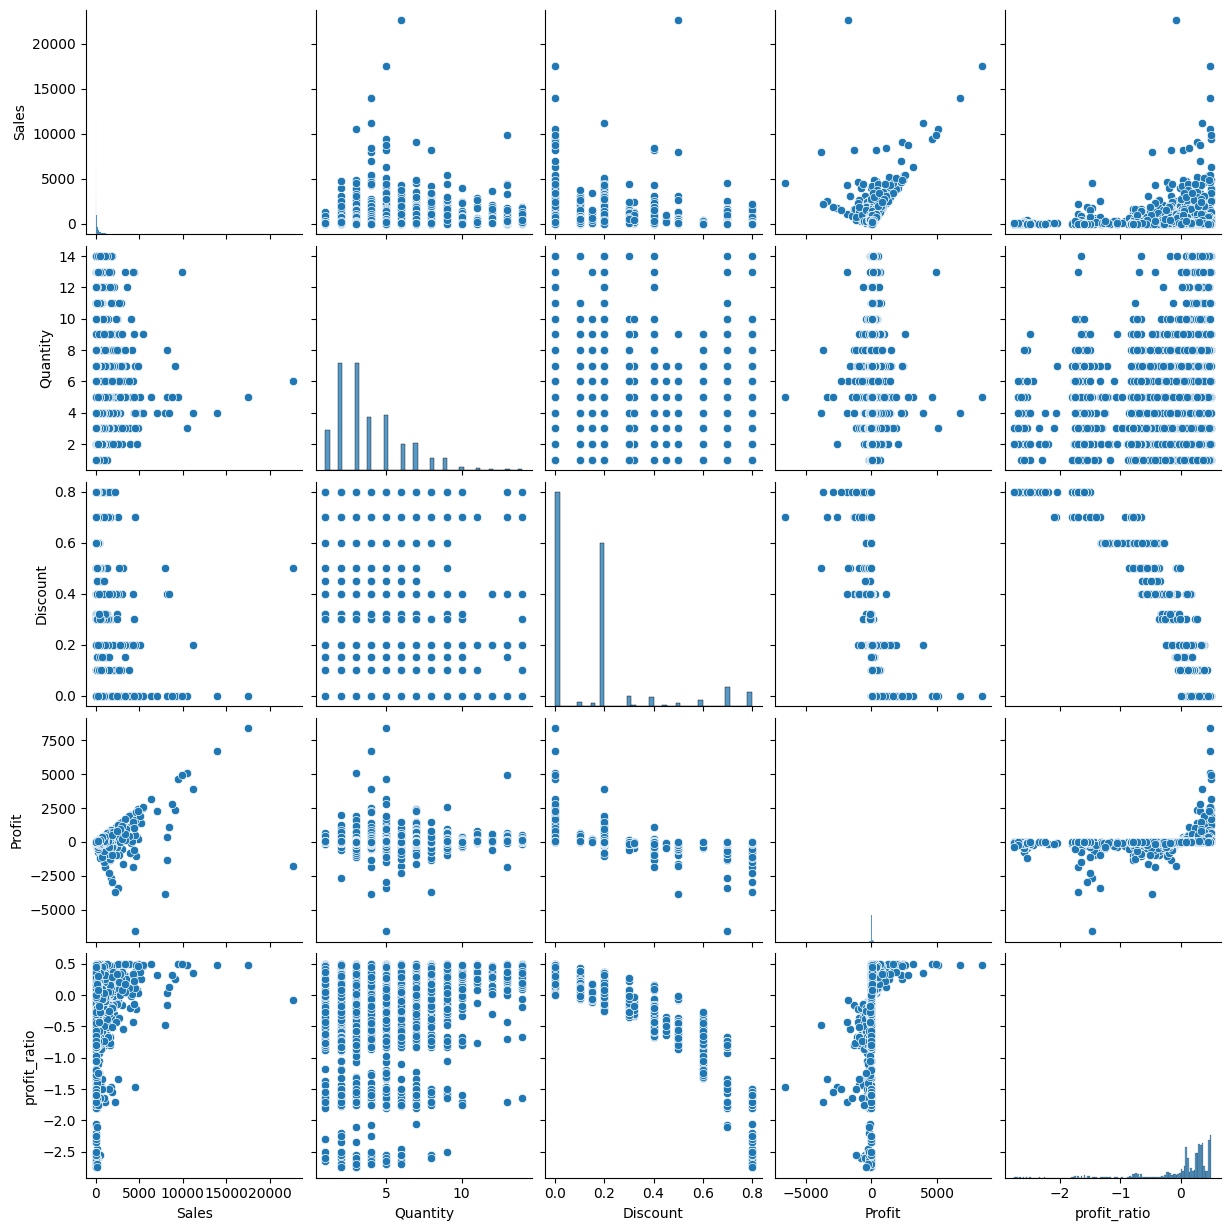

In [37]:
plt.figure(figsize=(10,8),dpi = 200)
sns.pairplot(df[num_cols])
plt.show()

The pairplot shows that Sales and Profit have a clear positive relationship, meaning higher sales generally lead to higher profit, although variability increases at higher sales levels. Discount appears negatively related to Profit and profit_ratio, suggesting that higher discounts tend to reduce profitability. Quantity has weak or scattered relationships with most variables, indicating it alone is not a strong predictor of profit or sales. Overall, the strongest visible patterns are the positive link between Sales and Profit and the negative impact of Discount on profitability metrics.

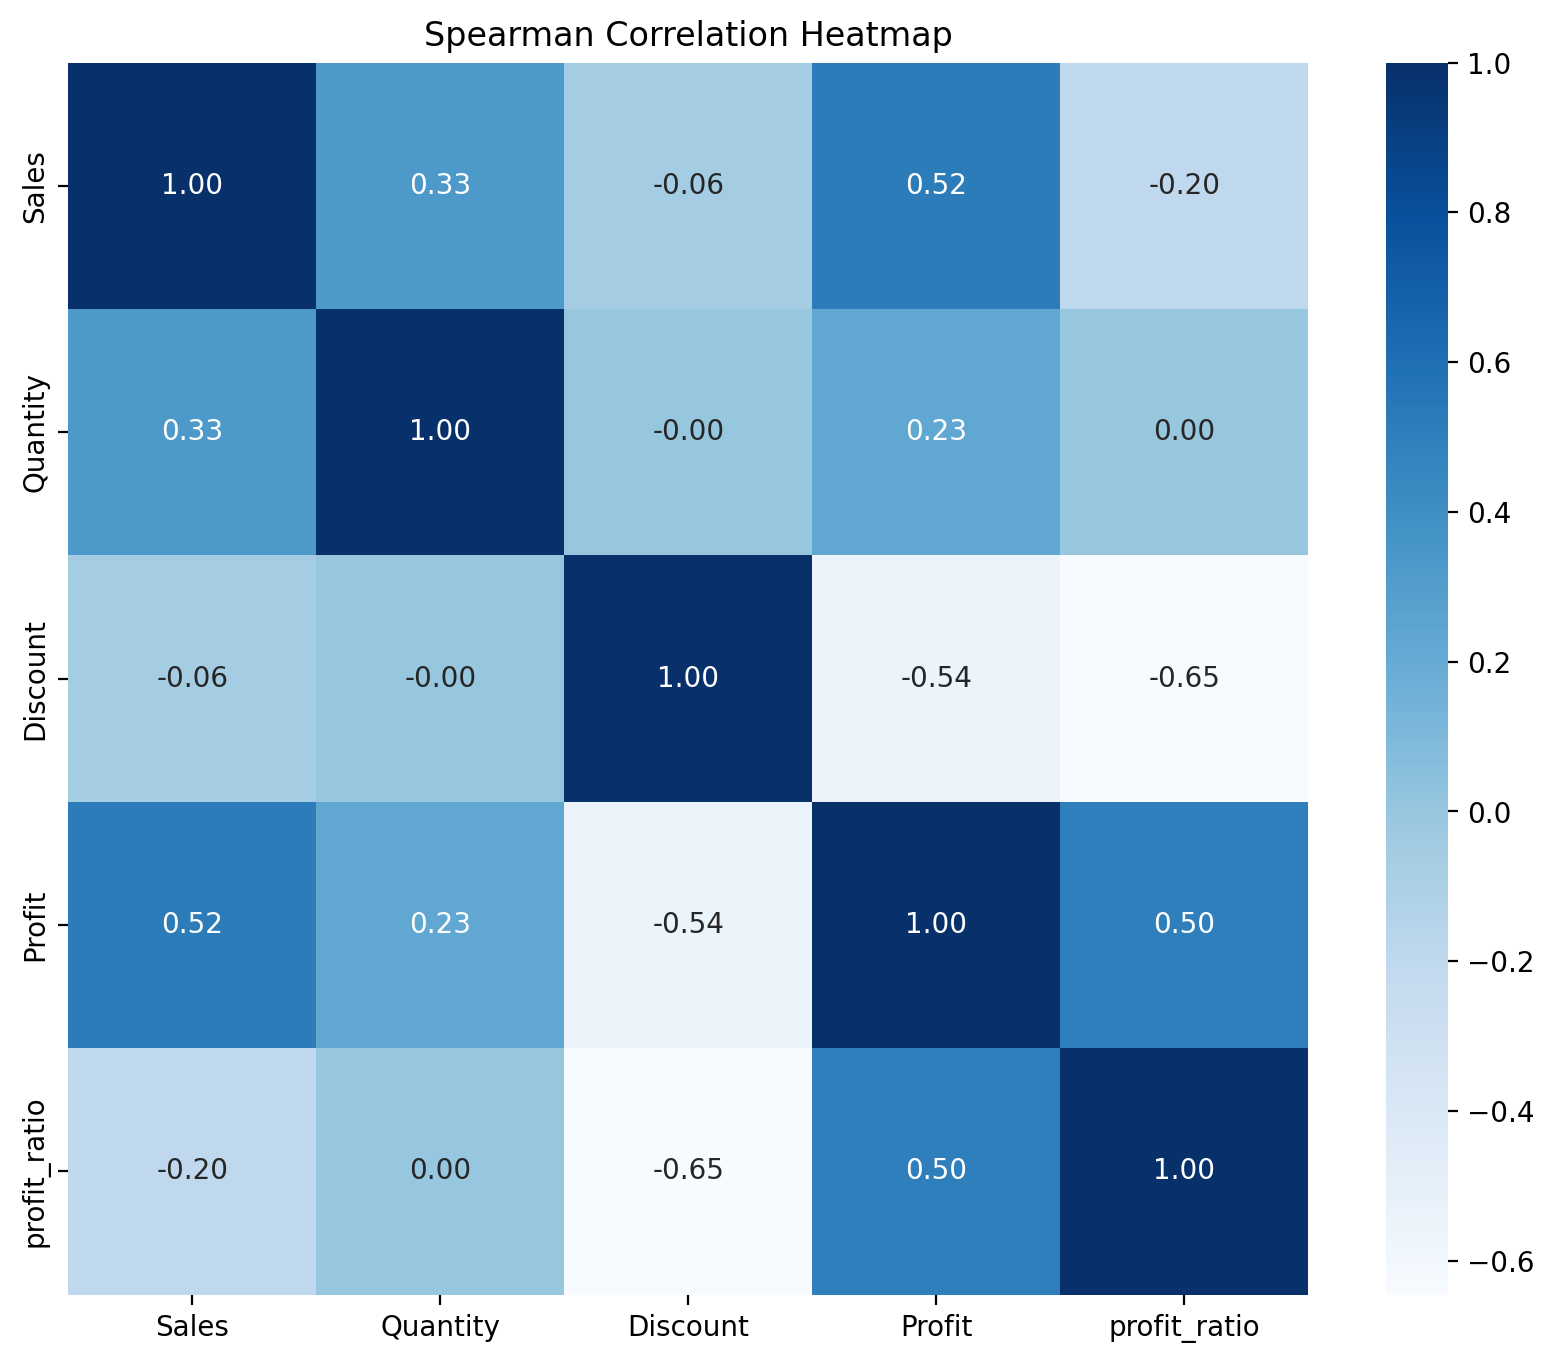

In [38]:
corr_spearman = df[num_cols].corr(method='spearman')

plt.figure(figsize=(10,8),dpi = 200)
sns.heatmap(corr_spearman, annot=True, cmap='Blues', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()


The heatmap shows that Sales and Profit have a moderately strong positive relationship (0.52), meaning higher sales generally correspond to higher profit. Discount has a strong negative relationship with both Profit (-0.54) and profit_ratio (-0.65), indicating that increasing discounts significantly reduces profitability. Quantity has weak correlations with most variables, suggesting it is not a strong driver of profit or profit ratio in this dataset. Overall, profitability is most strongly influenced by Sales (positively) and Discount (negatively), with Discount being the most impactful factor among the variables shown.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 1 to 9994
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Order_ID       9993 non-null   object  
 1   Order_Date     9993 non-null   object  
 2   Ship_Date      9993 non-null   object  
 3   Ship_Mode      9993 non-null   category
 4   Customer_ID    9993 non-null   object  
 5   Customer_Name  9993 non-null   object  
 6   Segment        9993 non-null   category
 7   City           9993 non-null   category
 8   State          9993 non-null   category
 9   Postal_Code    9993 non-null   category
 10  Region         9993 non-null   category
 11  Product_ID     9993 non-null   category
 12  Category       9993 non-null   category
 13  Sub-Category   9993 non-null   category
 14  Product_Name   9993 non-null   category
 15  Sales          9993 non-null   float64 
 16  Quantity       9993 non-null   int64   
 17  Discount       9993 non-null   float64

In [40]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'profit_ratio'], dtype='object')

In [41]:
def estimate_all_numeric(df):
    results = []

    for col in num_cols:
        series = df[col].dropna()
        n = len(series)
        mean = series.mean()
        median = series.median()
        std = series.std()
        se = std / np.sqrt(n)
        
        ci_low = mean - 1.96 * se
        ci_high = mean + 1.96 * se
        
        results.append({
            "Column": col,
            "Mean": mean,
            "Median": median,
            "Std Dev": std,
            "Standard Error": se,
            "95% CI Lower": ci_low,
            "95% CI Upper": ci_high
        })
        
    return pd.DataFrame(results)


In [42]:
numeric_estimates = estimate_all_numeric(df)
numeric_estimates

,Column,Mean,Median,Std Dev,Standard Error,95% CI Lower,95% CI Upper
0,Sales,229.852846,54.480,623.276074,6.234943,217.632357,242.073335
1,Quantity,3.789753,3.000,2.225149,0.022259,3.746125,3.833381
2,Discount,0.156188,0.200,0.206457,0.002065,0.152140,0.160236
3,Profit,28.660971,8.671,234.271476,2.343535,24.067642,33.254300
4,profit_ratio,0.120312,0.270,0.466768,0.004669,0.111160,0.129463


In [43]:
def bootstrap_means(df, n_bootstrap=1000):
    bootstrap_results = {}

    for col in num_cols:
        means = []
        for _ in range(n_bootstrap):
            sample = df[col].sample(frac=1, replace=True)
            means.append(sample.mean())
        
        bootstrap_results[col] = {
            "Bootstrap Mean": np.mean(means),
            "Bootstrap SE": np.std(means),
            "CI Lower": np.percentile(means, 2.5),
            "CI Upper": np.percentile(means, 97.5)
        }

    return pd.DataFrame(bootstrap_results).T


In [44]:
bootstrap_results = bootstrap_means(df)
bootstrap_results

,Bootstrap Mean,Bootstrap SE,CI Lower,CI Upper
Sales,229.906113,6.245529,217.896349,242.174068
Quantity,3.790989,0.022247,3.748116,3.833694
Discount,0.156285,0.002082,0.152134,0.160343
Profit,28.751319,2.256359,24.295737,33.143566
profit_ratio,0.120449,0.004617,0.111508,0.130057


Your analytical estimates and bootstrap results are almost identical for all numerical columns, which means your average metrics are statistically stable. Sales, Quantity, Discount, and profit_ratio show very tight confidence intervals, indicating consistent and predictable business performance. Profit has slightly wider intervals, meaning it varies more and carries higher risk compared to other metrics. The similarity between analytical and bootstrap confidence intervals confirms that your large sample size makes the mean estimates reliable. Overall, your business metrics appear statistically well-behaved, with no major instability or distortion from extreme values.